In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RepeatedStratifiedKFold,KFold,cross_val_score,StratifiedKFold
from sklearn.metrics import (accuracy_score, log_loss, confusion_matrix,classification_report)
from sklearn.ensemble import BaggingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from numpy import mean
from numpy import std

import optuna
from optuna import Trial, visualization

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split

%matplotlib inline

#### Import test and train datasets

In [3]:
train_data = pd.read_csv('Phising_Training_Dataset.csv',index_col=0)
test_data  = pd.read_csv('Phising_Testing_Dataset.csv', index_col=0)
sample     = pd.read_csv('sample_submission.csv')

#### Data Analysis

In [10]:
train_data.head()

having_IP  URL_Length  Shortining_Service  having_At_Symbol  \
key                                                                  
12344         -1           1                   1                 1   
12345          1           1                   1                 1   
12346          1           0                   1                 1   
12347          1           0                   1                 1   
12348          1           0                  -1                 1   

       double_slash_redirecting  Prefix_Suffix  having_Sub_Domain  \
key                                                                 
12344                        -1             -1                 -1   
12345                         1             -1                  0   
12346                         1             -1                 -1   
12347                         1             -1                 -1   
12348                         1             -1                  1   

       SSLfinal_State  Domain_registeration_length  Favicon  ...  popUpWidnow  \
key                                                          ...                
12344              -1                           -1        1  ...            1   
12345               1                           -1        1  ...            1   
12346              -1                           -1        1  ...            1   
12347              -1                            1        1  ...            1   
12348               1                           -1        1  ...           -1   

       Iframe  age_of_domain  DNSRecord  web_traffic  Page_Rank  Google_Index  \
key                                                                             
12344       1             -1         -1           -1         -1             1   
12345       1             -1         -1            0         -1             1   
12346       1              1         -1            1         -1             1   
12347       1             -1         -1            1         -1             1   
12348       1             -1         -1            0         -1             1   

       Links_pointing_to_page  Statistical_report  Result  
key                                                        
12344                       1                  -1      -1  
12345                       1                   1      -1  
12346                       0                  -1      -1  
12347                      -1                   1      -1  
12348                       1                   1       1  

[5 rows x 31 columns]

In [11]:
train_data.shape

(8955, 31)

In [12]:
train_data.describe()

having_IP   URL_Length  Shortining_Service  having_At_Symbol  \
count  8955.000000  8955.000000         8955.000000       8955.000000   
mean      0.307203    -0.635734            0.740480          0.709436   
std       0.951697     0.763660            0.672116          0.704809   
min      -1.000000    -1.000000           -1.000000         -1.000000   
25%      -1.000000    -1.000000            1.000000          1.000000   
50%       1.000000    -1.000000            1.000000          1.000000   
75%       1.000000    -1.000000            1.000000          1.000000   
max       1.000000     1.000000            1.000000          1.000000   

       double_slash_redirecting  Prefix_Suffix  having_Sub_Domain  \
count               8955.000000    8955.000000        8955.000000   
mean                   0.740704      -0.735343           0.071803   
std                    0.671870       0.677733           0.817419   
min                   -1.000000      -1.000000          -1.000000   
25%                    1.000000      -1.000000          -1.000000   
50%                    1.000000      -1.000000           0.000000   
75%                    1.000000      -1.000000           1.000000   
max                    1.000000       1.000000           1.000000   

       SSLfinal_State  Domain_registeration_length      Favicon  ...  \
count     8955.000000                   8955.00000  8955.000000  ...   
mean         0.264545                     -0.33646     0.623227  ...   
std          0.908003                      0.94175     0.782084  ...   
min         -1.000000                     -1.00000    -1.000000  ...   
25%         -1.000000                     -1.00000     1.000000  ...   
50%          1.000000                     -1.00000     1.000000  ...   
75%          1.000000                      1.00000     1.000000  ...   
max          1.000000                      1.00000     1.000000  ...   

       popUpWidnow       Iframe  age_of_domain    DNSRecord  web_traffic  \
count  8955.000000  8955.000000    8955.000000  8955.000000  8955.000000   
mean      0.606700     0.829816       0.028922     0.371078     0.291792   
std       0.794975     0.558069       0.999637     0.928654     0.825557   
min      -1.000000    -1.000000      -1.000000    -1.000000    -1.000000   
25%       1.000000     1.000000      -1.000000    -1.000000     0.000000   
50%       1.000000     1.000000       1.000000     1.000000     1.000000   
75%       1.000000     1.000000       1.000000     1.000000     1.000000   
max       1.000000     1.000000       1.000000     1.000000     1.000000   

         Page_Rank  Google_Index  Links_pointing_to_page  Statistical_report  \
count  8955.000000   8955.000000             8955.000000         8955.000000   
mean     -0.479397      0.712339                0.338582            0.728867   
std       0.877647      0.701874                0.576068            0.684694   
min      -1.000000     -1.000000               -1.000000           -1.000000   
25%      -1.000000      1.000000                0.000000            1.000000   
50%      -1.000000      1.000000                0.000000            1.000000   
75%       1.000000      1.000000                1.000000            1.000000   
max       1.000000      1.000000                1.000000            1.000000   

            Result  
count  8955.000000  
mean      0.124288  
std       0.992302  
min      -1.000000  
25%      -1.000000  
50%       1.000000  
75%       1.000000  
max       1.000000  

[8 rows x 31 columns]

In [13]:
train_data.isnull().sum().sort_values(ascending = False)

having_IP                      0
Submitting_to_email            0
Statistical_report             0
Links_pointing_to_page         0
Google_Index                   0
Page_Rank                      0
web_traffic                    0
DNSRecord                      0
age_of_domain                  0
Iframe                         0
popUpWidnow                    0
RightClick                     0
on_mouseover                   0
Redirect                       0
Abnormal_URL                   0
SFH                            0
URL_Length                     0
Links_in_tags                  0
URL_of_Anchor                  0
Request_URL                    0
HTTPS_token                    0
port                           0
Favicon                        0
Domain_registeration_length    0
SSLfinal_State                 0
having_Sub_Domain              0
Prefix_Suffix                  0
double_slash_redirecting       0
having_At_Symbol               0
Shortining_Service             0
Result    

In [14]:
train_data.nunique()

having_IP                      2
URL_Length                     3
Shortining_Service             2
having_At_Symbol               2
double_slash_redirecting       2
Prefix_Suffix                  2
having_Sub_Domain              3
SSLfinal_State                 3
Domain_registeration_length    2
Favicon                        2
port                           2
HTTPS_token                    2
Request_URL                    2
URL_of_Anchor                  3
Links_in_tags                  3
SFH                            3
Submitting_to_email            2
Abnormal_URL                   2
Redirect                       2
on_mouseover                   2
RightClick                     2
popUpWidnow                    2
Iframe                         2
age_of_domain                  2
DNSRecord                      2
web_traffic                    3
Page_Rank                      2
Google_Index                   2
Links_pointing_to_page         3
Statistical_report             2
Result    

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8955 entries, 12344 to 21298
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP                    8955 non-null   int64
 1   URL_Length                   8955 non-null   int64
 2   Shortining_Service           8955 non-null   int64
 3   having_At_Symbol             8955 non-null   int64
 4   double_slash_redirecting     8955 non-null   int64
 5   Prefix_Suffix                8955 non-null   int64
 6   having_Sub_Domain            8955 non-null   int64
 7   SSLfinal_State               8955 non-null   int64
 8   Domain_registeration_length  8955 non-null   int64
 9   Favicon                      8955 non-null   int64
 10  port                         8955 non-null   int64
 11  HTTPS_token                  8955 non-null   int64
 12  Request_URL                  8955 non-null   int64
 13  URL_of_Anchor                8955 non-null 

In [16]:
from pandas_profiling import ProfileReport

In [17]:
train_data_original = train_data.copy()

In [18]:
train_data_original

having_IP  URL_Length  Shortining_Service  having_At_Symbol  \
key                                                                  
12344         -1           1                   1                 1   
12345          1           1                   1                 1   
12346          1           0                   1                 1   
12347          1           0                   1                 1   
12348          1           0                  -1                 1   
...          ...         ...                 ...               ...   
21294          1          -1                   1                -1   
21295         -1           1                   1                -1   
21296          1          -1                   1                 1   
21297         -1          -1                   1                 1   
21298         -1          -1                   1                 1   

       double_slash_redirecting  Prefix_Suffix  having_Sub_Domain  \
key                                                                 
12344                        -1             -1                 -1   
12345                         1             -1                  0   
12346                         1             -1                 -1   
12347                         1             -1                 -1   
12348                         1             -1                  1   
...                         ...            ...                ...   
21294                         1              1                  1   
21295                        -1             -1                  1   
21296                         1             -1                  1   
21297                         1             -1                 -1   
21298                         1             -1                 -1   

       SSLfinal_State  Domain_registeration_length  Favicon  ...  popUpWidnow  \
key                                                          ...                
12344              -1                           -1        1  ...            1   
12345               1                           -1        1  ...            1   
12346              -1                           -1        1  ...            1   
12347              -1                            1        1  ...            1   
12348               1                           -1        1  ...           -1   
...               ...                          ...      ...  ...          ...   
21294               1                           -1       -1  ...           -1   
21295              -1                           -1       -1  ...           -1   
21296              -1                           -1        1  ...            1   
21297              -1                            1       -1  ...           -1   
21298              -1                            1        1  ...            1   

       Iframe  age_of_domain  DNSRecord  web_traffic  Page_Rank  Google_Index  \
key                                                                             
12344       1             -1         -1           -1         -1             1   
12345       1             -1         -1            0         -1             1   
12346       1              1         -1            1         -1             1   
12347       1             -1         -1            1         -1             1   
12348       1             -1         -1            0         -1             1   
...       ...            ...        ...          ...        ...           ...   
21294      -1              1          1           -1         -1             1   
21295       1              1          1            1          1             1   
21296       1              1          1            1         -1             1   
21297       1              1          1            1         -1             1   
21298       1             -1          1           -1         -1            -1   

       Links_pointing_to_page  Statistical_report  Result  
key                           

In [19]:
profile = ProfileReport(train_data)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Prepration

In [20]:
# features with two categories 

binaryvarlist =  ['having_IP', 'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix','Domain_registeration_length','Favicon',
            'port','HTTPS_token','Request_URL','Submitting_to_email','Abnormal_URL','on_mouseover','RightClick','popUpWidnow','Iframe','age_of_domain',
            'DNSRecord','web_traffic','Page_Rank','Google_Index','Statistical_report']

# map function
def binary_map(x):
    return x.map({1: 1, -1: 0})

train_data[binaryvarlist+['Result']] = train_data[binaryvarlist+['Result']].apply(binary_map)
test_data[binaryvarlist] = test_data[binaryvarlist].apply(binary_map)

train_data[binaryvarlist].add_suffix('_legitimate')
test_data[binaryvarlist].add_suffix('_legitimate')


having_IP_legitimate  Shortining_Service_legitimate  \
key                                                          
21338                     1                              1   
21339                     1                              1   
21340                     1                              1   
21341                     0                              0   
21342                     1                              1   
...                     ...                            ...   
23433                     0                              0   
23434                     1                              1   
23435                     1                              1   
23436                     1                              1   
23437                     0                              0   

       having_At_Symbol_legitimate  double_slash_redirecting_legitimate  \
key                                                                       
21338                            1                                    1   
21339                            1                                    1   
21340                            1                                    1   
21341                            1                                    0   
21342                            1                                    1   
...                            ...                                  ...   
23433                            1                                    0   
23434                            0                                    1   
23435                            1                                    1   
23436                            0                                    1   
23437                            0                                    0   

       Prefix_Suffix_legitimate  Domain_registeration_length_legitimate  \
key                                                                       
21338                         1                                       0   
21339                         0                                       1   
21340                         0                                       0   
21341                         0                                       1   
21342                         0                                       0   
...                         ...                                     ...   
23433                         0                                       1   
23434                         0                                       0   
23435                         0                                       1   
23436                         0                                       0   
23437                         0                                       1   

       Favicon_legitimate  port_legitimate  HTTPS_token_legitimate  \
key                                                                  
21338                   1                1                       1   
21339                   1                1                       1   
21340                   0                0                       1   
21341                   0                0                       0   
21342                   1                1                       1   
...                   ...              ...                     ...   
23433                   1                1                       0   
23434                   0                0                       1   
23435                   1                1                       1   
23436                   0                0                       1   
23437                   0                1                       0   

       Request_URL_legitimate  ...  on_mouseover_legitimate  \
key                            ...                            
21338                       1  ...                        1   
21339                       1  ...                        1   
21340                       0  ...                        0   
21341                 

#### One Hot Endoding on variables

In [21]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.

def ordinaldata_map(x):
    return x.map({1: 'legitimate',0:'suspicious', -1: 'phishing'})

ordinal_varlist= ['URL_Length', 'having_Sub_Domain', 'SSLfinal_State', 'URL_of_Anchor','Links_in_tags','SFH','web_traffic','Links_pointing_to_page']

train_data[ordinal_varlist] = train_data[ordinal_varlist].apply(ordinaldata_map)
test_data[ordinal_varlist] = test_data[ordinal_varlist].apply(ordinaldata_map)

dummy1 = pd.get_dummies(train_data[ordinal_varlist], drop_first=True)
train_data = pd.concat([train_data, dummy1], axis=1)

dummy2 = pd.get_dummies(test_data[ordinal_varlist], drop_first=True)

test_data = pd.concat([test_data, dummy2], axis=1)

In [22]:
train_data = train_data.drop(ordinal_varlist,1)
test_data = test_data.drop(ordinal_varlist,1)

In [23]:
train_data.Result.value_counts()

1    5034
0    3921
Name: Result, dtype: int64

In [24]:
legitimate = (sum(train_data['Result'])/len(train_data['Result'].index))*100
legitimate

56.214405360134

### Features and target Split

In [25]:
X = train_data.iloc[:, train_data.columns != 'Result']
y = train_data.iloc[:, train_data.columns == 'Result']


## Model :  Logistic regression - Binary classification

#### Feature Engineering

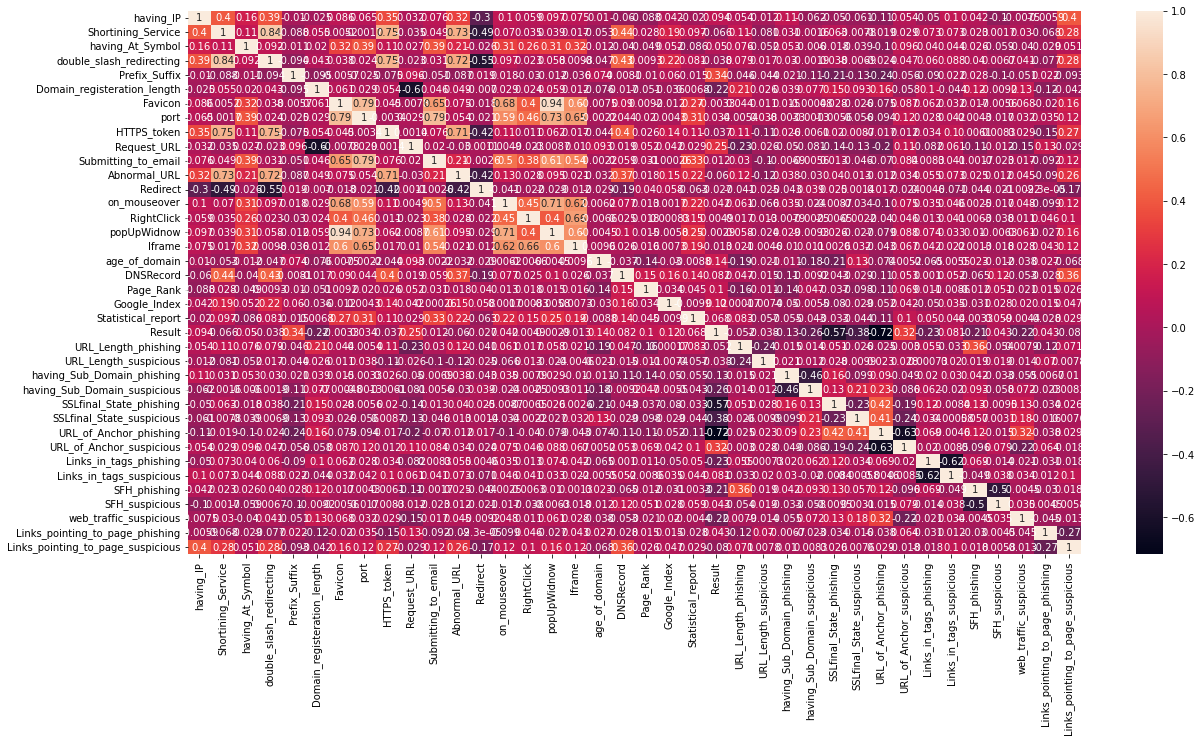

In [26]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(train_data.corr(),annot = True)
plt.show()


#### Dropping highly correlated  features

In [27]:

X_feature = X.drop(['Favicon','HTTPS_token','port','double_slash_redirecting','on_mouseover','popUpWidnow','Abnormal_URL'],1)

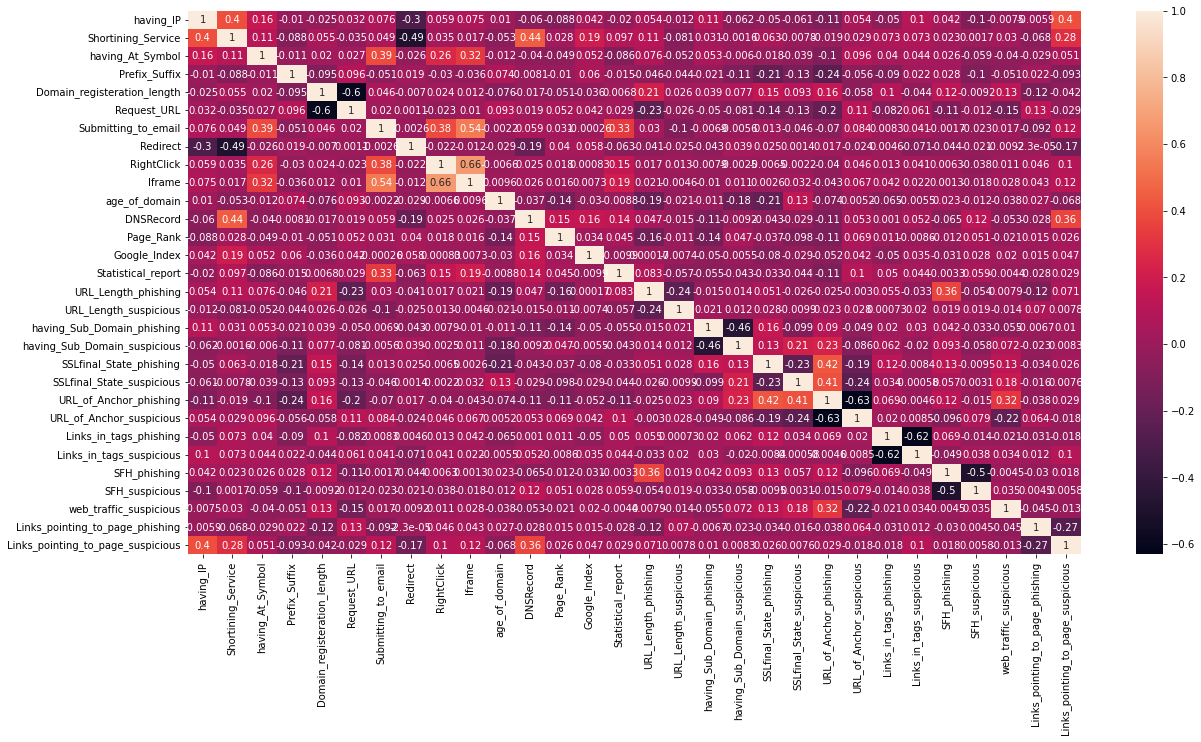

In [28]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_feature.corr(),annot = True)
plt.show()

In [29]:
X_train, X_val, y_train, y_val = train_test_split(X_feature, y, stratify=y, test_size=0.2, random_state=50)

In [30]:
logreg = LogisticRegression()

#### Using RFE for Feature selection

In [31]:
for i in range(10,30):
  rfe = RFE(logreg,n_features_to_select=i)             
  pipeline = Pipeline(steps=[('s',rfe),('m',logreg)])
  cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=3, random_state=None)
  n_scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
  print('Number of features:',i)
  print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Number of features: 10
Accuracy: 0.924 (0.014)
Number of features: 11
Accuracy: 0.928 (0.014)
Number of features: 12
Accuracy: 0.928 (0.015)
Number of features: 13
Accuracy: 0.928 (0.013)
Number of features: 14
Accuracy: 0.930 (0.014)
Number of features: 15
Accuracy: 0.934 (0.013)
Number of features: 16
Accuracy: 0.933 (0.012)
Number of features: 17
Accuracy: 0.933 (0.014)
Number of features: 18
Accuracy: 0.933 (0.015)
Number of features: 19
Accuracy: 0.934 (0.013)
Number of features: 20
Accuracy: 0.935 (0.013)
Number of features: 21
Accuracy: 0.935 (0.014)
Number of features: 22
Accuracy: 0.936 (0.013)
Number of features: 23
Accuracy: 0.935 (0.013)
Number of features: 24
Accuracy: 0.935 (0.014)
Number of features: 25
Accuracy: 0.934 (0.012)
Number of features: 26
Accuracy: 0.935 (0.011)
Number of features: 27
Accuracy: 0.936 (0.013)
Number of features: 28
Accuracy: 0.935 (0.013)
Number of features: 29
Accuracy: 0.935 (0.011)


based on the loop used in the RFE , 22 number of features can give optimal accuracy

In [41]:
rfe = RFE(logreg,n_features_to_select= 22)             # running RFE with 22 variables as output
rfe = rfe.fit(X_train, y_train)

selected features and their rankings using RFE 

In [43]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('having_IP', True, 1),
 ('Shortining_Service', True, 1),
 ('having_At_Symbol', True, 1),
 ('Prefix_Suffix', True, 1),
 ('Domain_registeration_length', False, 6),
 ('Request_URL', True, 1),
 ('Submitting_to_email', True, 1),
 ('Redirect', True, 1),
 ('RightClick', True, 1),
 ('Iframe', True, 1),
 ('age_of_domain', False, 2),
 ('DNSRecord', True, 1),
 ('Page_Rank', False, 3),
 ('Google_Index', True, 1),
 ('Statistical_report', True, 1),
 ('URL_Length_phishing', False, 9),
 ('URL_Length_suspicious', False, 8),
 ('having_Sub_Domain_phishing', True, 1),
 ('having_Sub_Domain_suspicious', True, 1),
 ('SSLfinal_State_phishing', True, 1),
 ('SSLfinal_State_suspicious', True, 1),
 ('URL_of_Anchor_phishing', True, 1),
 ('URL_of_Anchor_suspicious', True, 1),
 ('Links_in_tags_phishing', True, 1),
 ('Links_in_tags_suspicious', False, 4),
 ('SFH_phishing', True, 1),
 ('SFH_suspicious', False, 5),
 ('web_traffic_suspicious', False, 7),
 ('Links_pointing_to_page_phishing', True, 1),
 ('Links_pointing

In [44]:
col = X_train.columns[rfe.support_]

In [45]:
X_train.columns[~rfe.support_]

Index(['Domain_registeration_length', 'age_of_domain', 'Page_Rank',
       'URL_Length_phishing', 'URL_Length_suspicious',
       'Links_in_tags_suspicious', 'SFH_suspicious', 'web_traffic_suspicious'],
      dtype='object')

In [46]:
import statsmodels.api as sm

In [47]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Result   No. Observations:                 7164
Model:                            GLM   Df Residuals:                     7141
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1191.6
Date:                Mon, 06 Jun 2022   Deviance:                       2383.3
Time:                        20:40:01   Pearson chi2:                 4.56e+03
No. Iterations:                    26   Pseudo R-squ. (CS):             0.6459
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 5.6961      0.467     12.187      0.000       4.780       6.612
having_IP                             1.3749      0.158      8.684      0.000       1.065       1.685
Shortining_Service                   -2.5687      0.278     -9.237      0.000      -3.114      -2.024
having_At_Symbol                      0.6284      0.198      3.178      0.001       0.241       1.016
Prefix_Suffix                        26.1041   1.55e+04      0.002      0.999   -3.04e+04    3.05e+04
Request_URL                           0.4580      0.111      4.124      0.000       0.240       0.676
Submitting_to_email                  -0.5262      0.201     -2.624      0.009      -0.919      -0.133
Redirect                             -1.0957      0.206     -5.325      0.000      -1.499      -0.692
RightClick                            0.9450      0.429      2.202      0.028       0.104       1.786
Iframe                               -0.9059      0.343     -2.644      0.008      -1.578      -0.234
DNSRecord                             1.2716      0.154      8.260      0.000       0.970       1.573
Google_Index                          1.1548      0.153      7.540      0.000       0.855       1.455
Statistical_report                    0.3837      0.203      1.891      0.059      -0.014       0.782
having_Sub_Domain_phishing           -1.0175      0.135     -7.519      0.000      -1.283      -0.752
having_Sub_Domain_suspicious         -0.8860      0.131     -6.752      0.000      -1.143      -0.629
SSLfinal_State_phishing              -2.8639      0.119    -24.012      0.000      -3.098      -2.630
SSLfinal_State_suspicious            -4.1581      0.301    -13.835      0.000      -4.747      -3.569
URL_of_Anchor_phishing               -6.9677      0.372    -18.732      0.000      -7.697      -6.239
URL_of_Anchor_suspicious             -1.9095      0.178    -10.735      0.000      -2.258      -1.561
Links_in_tags_phishing               -1.4148      0.111    -12.704      0.000      -1.633      -1.197
SFH_phishing                         -1.3834      0.150     -9.206      0.000      -1.678      -1.089
Links_pointing_to_page_phishing      -0.9294      0.244     -3.808      0.000      -1.408      -0.451
Links_pointing_to_page_suspicious    -1.3270      0.148     -8.995      0.000      -1.616      -1.038
=====================================================================================================
"""

testing the model using validation dataset

In [49]:
X_val_sm = sm.add_constant(X_val[col])
y_train_pred = res.predict(X_val_sm)

In [50]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1.00000000e+00, 3.87441846e-01, 9.94253501e-01, 1.36971843e-04,
       9.65396661e-01, 9.61870659e-01, 3.59094358e-04, 8.81665214e-04,
       9.82132769e-01, 9.44475775e-01])

In [51]:
y_train_pred_final = pd.DataFrame({'Target_prob':y_train_pred})
y_train_pred_final['Target'] =  y_val.values
y_train_pred_final['key'] = y_val.index
y_train_pred_final.head()

Target_prob  Target    key
0     1.000000       1  16915
1     0.387442       1  20166
2     0.994254       1  20290
3     0.000137       0  18783
4     0.965397       1  18306

In [52]:
y_train_pred_final['predicted'] = y_train_pred_final.Target_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

Target_prob  Target    key  predicted
0     1.000000       1  16915          1
1     0.387442       1  20166          0
2     0.994254       1  20290          1
3     0.000137       0  18783          0
4     0.965397       1  18306          1

In [53]:
from sklearn import metrics

In [57]:
confusion = metrics.confusion_matrix(y_train_pred_final.Target, y_train_pred_final.predicted )
print("Confusion Matrix of the model using validation dataset\n",confusion)

Confusion Matrix of the model using validation dataset
 [[708  76]
 [ 37 970]]


In [59]:
print("Accuracy score on the validaiton dataset\n")
print(metrics.accuracy_score(y_train_pred_final.Target, y_train_pred_final.predicted))

Accuracy score on the validaiton dataset

0.9369067560022334


#### Fine-tuning of the model by removing highly co-related features

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
7                          RightClick  33.87
8                              Iframe  25.45
1                  Shortining_Service  15.43
5                 Submitting_to_email   9.65
2                    having_At_Symbol   9.17
11                 Statistical_report   8.56
10                       Google_Index   7.24
9                           DNSRecord   5.62
0                           having_IP   5.13
19                       SFH_phishing   4.24
16             URL_of_Anchor_phishing   4.02
21  Links_pointing_to_page_suspicious   3.78
17           URL_of_Anchor_suspicious   3.39
14            SSLfinal_State_phishing   2.63
4                         Request_URL   2.58
13       having_Sub_Domain_suspicious   2.18
12         having_Sub_Domain_phishing   2.01
15          SSLfinal_State_suspicious   1.92
18             Links_in_tags_phishing   1.65
6                            Redirect   1.50
3                       Prefix_Suffix   1.35
20    Links_pointing_to_page_phishing   1.24

removing the feature and re-building the logisitc model to fine-tune its performace

In [62]:
col = col.drop('RightClick', 1)
#col

In [63]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Result   No. Observations:                 7164
Model:                            GLM   Df Residuals:                     7142
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1194.0
Date:                Mon, 06 Jun 2022   Deviance:                       2388.1
Time:                        20:44:33   Pearson chi2:                 4.49e+03
No. Iterations:                    26   Pseudo R-squ. (CS):             0.6457
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 6.1799      0.419     14.745      0.000       5.358       7.001
having_IP                             1.3491      0.157      8.573      0.000       1.041       1.658
Shortining_Service                   -2.5498      0.277     -9.202      0.000      -3.093      -2.007
having_At_Symbol                      0.6419      0.197      3.254      0.001       0.255       1.028
Prefix_Suffix                        26.0581   1.56e+04      0.002      0.999   -3.05e+04    3.06e+04
Request_URL                           0.4550      0.111      4.103      0.000       0.238       0.672
Submitting_to_email                  -0.5209      0.201     -2.591      0.010      -0.915      -0.127
Redirect                             -1.1091      0.205     -5.416      0.000      -1.510      -0.708
Iframe                               -0.4802      0.271     -1.769      0.077      -1.012       0.052
DNSRecord                             1.2563      0.153      8.193      0.000       0.956       1.557
Google_Index                          1.1593      0.153      7.599      0.000       0.860       1.458
Statistical_report                    0.3944      0.203      1.947      0.052      -0.003       0.792
having_Sub_Domain_phishing           -1.0219      0.135     -7.560      0.000      -1.287      -0.757
having_Sub_Domain_suspicious         -0.8868      0.131     -6.760      0.000      -1.144      -0.630
SSLfinal_State_phishing              -2.8637      0.119    -24.042      0.000      -3.097      -2.630
SSLfinal_State_suspicious            -4.1970      0.300    -13.973      0.000      -4.786      -3.608
URL_of_Anchor_phishing               -6.9136      0.366    -18.892      0.000      -7.631      -6.196
URL_of_Anchor_suspicious             -1.9110      0.177    -10.788      0.000      -2.258      -1.564
Links_in_tags_phishing               -1.4045      0.111    -12.637      0.000      -1.622      -1.187
SFH_phishing                         -1.3721      0.150     -9.169      0.000      -1.665      -1.079
Links_pointing_to_page_phishing      -0.8901      0.243     -3.668      0.000      -1.366      -0.414
Links_pointing_to_page_suspicious    -1.3180      0.147     -8.952      0.000      -1.607      -1.029
=====================================================================================================
"""

In [64]:
X_val_sm = sm.add_constant(X_val[col])
y_train_pred = res.predict(X_val_sm).values.reshape(-1)


In [65]:
y_train_pred_final['Target_prob'] = y_train_pred

In [66]:
y_train_pred_final['predicted'] = y_train_pred_final.Target_prob.map(lambda x: 1 if x > 0.5 else 0)
#y_train_pred_final.head()

In [68]:
print("Model accuracy after removing the feature based on VIF score")
print(metrics.accuracy_score(y_train_pred_final.Target, y_train_pred_final.predicted))

Model accuracy after removing the feature based on VIF score
0.9369067560022334


#### Finding optimal solvers and regularisiaiton techniqur using GridSearchCV 

In [69]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear','saga']
penalty = ['l1','l2','elasticnet','none']
c_values = [0.001, 0.01, 0.1, 1.0, 10, 100, 1000]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train[col], y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))    

Best: 0.936862 using {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 0.001, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 0.001, 'penalty': 'l1', 'solver': 'lbfgs'}
0.437884 (0.000543) with: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
0.562116 (0.000543) with: {'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}
0.887728 (0.010182) with: {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
0.887728 (0.010182) with: {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
0.890706 (0.010290) with: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
0.887775 (0.010187) with: {'C': 0.001, 'penalty': 'l2', 'solver': 'saga'}
0.000000 (0.000000) with: {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 0.001, 'penalty': 'elastic

#### model building based on the paramaters from GridSearchCV

In [77]:
logreg_best = LogisticRegression(penalty='l1',C=1.0, solver='liblinear').fit(X_train[col], y_train)

In [78]:
#test using validation dataset
y_train_pred = logreg_best.predict(X_val[col])
y_train_pred[:10]

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

In [80]:
y_train_pred = y_train_pred.reshape(-1)
y_train_pred[:10]

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

In [81]:
y_train_pred_final = pd.DataFrame({'Target_prob':y_train_pred})
y_train_pred_final['Target'] =  y_val.values
y_train_pred_final['key'] = y_val.index
y_train_pred_final.head()

Target_prob  Target    key
0            1       1  16915
1            0       1  20166
2            1       1  20290
3            0       0  18783
4            1       1  18306

In [82]:
y_train_pred_final['predicted'] = y_train_pred_final.Target_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

Target_prob  Target    key  predicted
0            1       1  16915          1
1            0       1  20166          0
2            1       1  20290          1
3            0       0  18783          0
4            1       1  18306          1

In [83]:
confusion = metrics.confusion_matrix(y_train_pred_final.Target, y_train_pred_final.predicted )
print(confusion)

[[708  76]
 [ 36 971]]


#### Final accuray and classification report of the model Logistic regression Classifier

In [86]:

print(metrics.accuracy_score(y_train_pred_final.Target, y_train_pred_final.predicted))


0.937465103294249


In [85]:
print(classification_report(y_train_pred_final.Target, y_train_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       784
           1       0.93      0.96      0.95      1007

    accuracy                           0.94      1791
   macro avg       0.94      0.93      0.94      1791
weighted avg       0.94      0.94      0.94      1791



## Model: RandomForests Classifier

#### importing required libs.

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from numpy import arange

#### Test-train split

In [99]:
cv_outer =  RepeatedStratifiedKFold(n_splits=20, n_repeats=3, random_state=50)

for train_index, val_index in cv_outer.split(X, y):
  X_train, X_val = X.iloc[train_index], X.iloc[val_index]
  y_train, y_val = y.iloc[train_index], y.iloc[val_index]


In [100]:
print('dataset used in training', X_train.shape, y_train.shape)

dataset used in training (8508, 37) (8508, 1)


In [101]:
print('dataset used in validation', X_val.shape, y_val.shape)

dataset used in validation (447, 37) (447, 1)


In [102]:
features = X_train.columns.values

#### Model building with random forest classifier

In [107]:
rf1= RandomForestClassifier()

In [108]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(rf1, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.964 (0.006)


In [109]:
rf1.fit(X_train, y_train)
pred = rf1.predict(X_val)

In [110]:
y_true, y_pred = y_val, pred
print('validation accuracy:', accuracy_score(y_true, y_pred))

validation accuracy: 0.9664429530201343


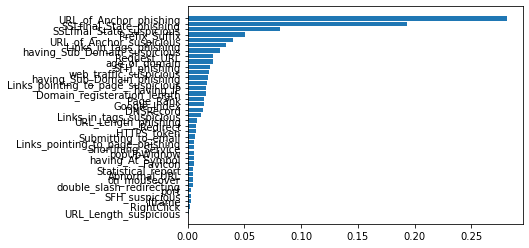

<Figure size 3000x4000 with 0 Axes>

In [124]:
rf2 = RandomForestClassifier(n_estimators=100)
rf2.fit(X_train, y_train)
f_i = list(zip(features,rf2.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.figure(figsize=(15, 20), dpi=200) 
plt.show()

#### Hyperparamater tuning for random Forests

##### using randomsearch grid

In [127]:
random_grid = {
               'max_depth': [20],
               'max_features': ['log2', 'sqrt','auto'],
               'min_samples_leaf': [1],
               'min_samples_split': [2],
               'n_estimators': [100,200],
    'bootstrap' : [True, False]
    }

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

random_search = RandomizedSearchCV(rf1, param_distributions=random_grid, n_iter=50, scoring='accuracy', n_jobs=-1, cv=cv, verbose=3, random_state=42)
grid_result = random_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))  


Fitting 30 folds for each of 12 candidates, totalling 360 fits
Best: 0.966227 using {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': False}
0.965169 (0.005774) with: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': True}
0.965483 (0.005336) with: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': True}
0.965051 (0.005603) with: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}
0.965482 (0.005847) with: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}
0.965561 (0.005437) with: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': True}
0.964777 (0

In [128]:
pred = grid_result.predict(X_val)

In [129]:
y_true, y_pred = y_val, pred
print('validation accuracy:', accuracy_score(y_val, grid_result.predict(X_val)))

validation accuracy: 0.9686800894854586


In [130]:
print("Best parameters set found on training set:")
print(grid_result.best_params_)

Best parameters set found on training set:
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': False}


In [132]:
print(classification_report(y_val, grid_result.predict(X_val)))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       196
           1       0.96      0.98      0.97       251

    accuracy                           0.97       447
   macro avg       0.97      0.97      0.97       447
weighted avg       0.97      0.97      0.97       447



In [135]:
import joblib

joblib.dump(grid_result, 'RandomForestClassifier_968.pkl')

['RandomForestClassifier_968.pkl']

##Model: XGBoost Classifier

In [136]:
import xgboost as xgb

#### Train-validaiton split of the dataset

In [137]:
cv_outer =  RepeatedStratifiedKFold(n_splits=20, n_repeats=3, random_state=50)

for train_index, val_index in cv_outer.split(X, y):
  X_train, X_val = X.iloc[train_index], X.iloc[val_index]
  y_train, y_val = y.iloc[train_index], y.iloc[val_index]


In [138]:
X_train.shape

(8508, 37)

In [139]:
xgb_cfl = xgb.XGBClassifier(objective='binary:logistic',
                          booster='gbtree',
                          eval_metric='auc',
                          tree_method='gpu_hist',
                          grow_policy='lossguide',
                          use_label_encoder=False)

xgb_cfl.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': 'auc',
 'gamma': None,
 'gpu_id': None,
 'grow_policy': 'lossguide',
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': 'gpu_hist',
 'validate_parameters': None,
 'verbosity': None}

In [140]:
# Fit the model to our train and target
xgb_cfl.fit(X_train, y_train)  # default 
# Get our predictions
xgb_predictions = xgb_cfl.predict(X_val)

In [141]:
y_true, y_pred = y_val, xgb_predictions
print('validation accuracy:', accuracy_score(y_val, xgb_cfl.predict(X_val)))

validation accuracy: 0.959731543624161


#### hyper-paramater tuning of  XG boost model using RandomisedSearchCV

In [142]:
params = {
        'n_estimators' : [100, 200, 500, 750], # no of trees 
        'learning_rate' : [0.01, 0.05,0.1,0.2,],  # eta
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [10, 12],
        }

folds = 5

param_comb = 800

random_search = RandomizedSearchCV(xgb_cfl, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, verbose=1, random_state=42)

In [143]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


RandomizedSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='auc', gamma=0, gpu_id=0,
                                           grow_policy='lossguide',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_bin=256, max_c...
                                           predictor='auto', random_state=0,
                                           reg_alpha=0, reg_lambda=1, ...),
                   n_iter=800, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.1, 0.5, 1, 1.5, 5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [10, 12],
                                        'min_child_weight': [1, 5, 7, 10],
                                        'n_estimators': [100, 200, 500, 750],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=1)

In [144]:
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ )
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0.1, gpu_id=0, grow_policy='lossguide',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

 Best accuracy for 5-fold search with 800 parameter combinations:
0.9630908341053269

 Best hyperparameters:
{'subsample': 0.6, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 12, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 1.0}


In [145]:
y_predict = random_search.predict(X_val)

In [146]:
y_true, y_pred = y_val, y_predict
print('validation accuracy:', accuracy_score(y_true, y_pred))

validation accuracy: 0.9664429530201343


In [147]:
print(confusion_matrix(y_true, y_pred))

[[186  10]
 [  5 246]]


In [148]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       196
           1       0.96      0.98      0.97       251

    accuracy                           0.97       447
   macro avg       0.97      0.96      0.97       447
weighted avg       0.97      0.97      0.97       447



In [149]:
import joblib

joblib.dump(grid_result, 'XGBoost_96644.pkl')

['XGBoost_96644.pkl']

### TabNet to perform binary classification

In [49]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

In [50]:
cv_outer =  RepeatedStratifiedKFold(n_splits=20, n_repeats=3, random_state=50)

for train_index, val_index in cv_outer.split(X, y):
  X_train, X_val = X.iloc[train_index], X.iloc[val_index]
  y_train, y_val = y.iloc[train_index], y.iloc[val_index]


In [73]:
X_train

having_IP  Shortining_Service  having_At_Symbol  \
key                                                      
12344          0                   1                 1   
12345          1                   1                 1   
12346          1                   1                 1   
12347          1                   1                 1   
12348          1                   0                 1   
...          ...                 ...               ...   
21294          1                   1                 0   
21295          0                   1                 0   
21296          1                   1                 1   
21297          0                   1                 1   
21298          0                   1                 1   

       double_slash_redirecting  Prefix_Suffix  Domain_registeration_length  \
key                                                                           
12344                         0              0                            0   
12345                         1              0                            0   
12346                         1              0                            0   
12347                         1              0                            1   
12348                         1              0                            0   
...                         ...            ...                          ...   
21294                         1              1                            0   
21295                         0              0                            0   
21296                         1              0                            0   
21297                         1              0                            1   
21298                         1              0                            1   

       Favicon  port  HTTPS_token  Request_URL  ...  \
key                                             ...   
12344        1     1            0            1  ...   
12345        1     1            0            1  ...   
12346        1     1            0            1  ...   
12347        1     1            0            0  ...   
12348        1     1            1            1  ...   
...        ...   ...          ...          ...  ...   
21294        0     0            1            1  ...   
21295        0     0            1            1  ...   
21296        1     1            1            1  ...   
21297        0     1            1            0  ...   
21298        1     1            1            0  ...   

       SSLfinal_State_suspicious  URL_of_Anchor_phishing  \
key                                                        
12344                          0                       1   
12345                          0                       0   
12346                          0                       0   
12347                          0                       0   
12348                          0                       0   
...                          ...                     ...   
21294                          0                       0   
21295                          0                       1   
21296                          0                       0   
21297                          0                       1   
21298                          0                       1   

       URL_of_Anchor_suspicious  Links_in_tags_phishing  \
key                                                       
12344                         0                       0   
12345                         1                       1   
12346                         1                       1   
12347                         1                       0   
12348                         1                       0   
...                         ...                     ...   
21294                         0                       0   
21295                         0                       1   
21296                         1                       1   
21297                         0                       0   
21298              

#### build model

In [23]:
 tb_cls = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=1e-3),
                       scheduler_params={"step_size":10, "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='entmax'
                       )

Device used : cuda


In [24]:
torch.cuda.is_available()

True

In [25]:
hist = tb_cls.fit(X_train=X_train.values,y_train=y_train['Result'].values,eval_set=[(X_train.values, y_train['Result'].values), (X_val.values, y_val['Result'].values)],eval_name=['training', 'validation'],eval_metric=['accuracy'],max_epochs=1000,patience=10,batch_size=100, drop_last=False)



epoch 0  | loss: 0.86851 | training_accuracy: 0.51387 | validation_accuracy: 0.566   |  0:00:08s
epoch 1  | loss: 0.68641 | training_accuracy: 0.72555 | validation_accuracy: 0.70917 |  0:00:11s
epoch 2  | loss: 0.5715  | training_accuracy: 0.79031 | validation_accuracy: 0.77405 |  0:00:15s
epoch 3  | loss: 0.48375 | training_accuracy: 0.83239 | validation_accuracy: 0.81879 |  0:00:18s
epoch 4  | loss: 0.40053 | training_accuracy: 0.8693  | validation_accuracy: 0.87025 |  0:00:22s
epoch 5  | loss: 0.34058 | training_accuracy: 0.89386 | validation_accuracy: 0.89485 |  0:00:26s
epoch 6  | loss: 0.29195 | training_accuracy: 0.90703 | validation_accuracy: 0.89485 |  0:00:29s
epoch 7  | loss: 0.26125 | training_accuracy: 0.91208 | validation_accuracy: 0.9038  |  0:00:33s
epoch 8  | loss: 0.25074 | training_accuracy: 0.91784 | validation_accuracy: 0.91051 |  0:00:36s
epoch 9  | loss: 0.23675 | training_accuracy: 0.9209  | validation_accuracy: 0.91051 |  0:00:40s
epoch 10 | loss: 0.2318  | tra

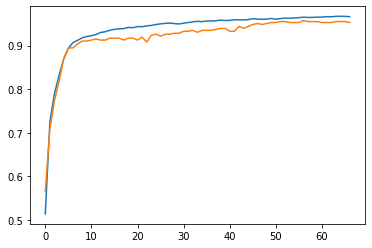

In [29]:
plt.plot(tb_cls.history['training_accuracy'])
plt.plot(tb_cls.history['validation_accuracy'])


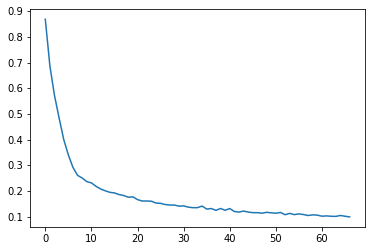

In [30]:
plt.plot(tb_cls.history['loss'])

In [31]:
y_predict = tb_cls.predict(X_val.values)
y_true, y_pred = y_val, y_predict
print('validation accuracy:', accuracy_score(y_true, y_pred))

validation accuracy: 0.9574944071588367


In [32]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       196
           1       0.95      0.98      0.96       251

    accuracy                           0.96       447
   macro avg       0.96      0.95      0.96       447
weighted avg       0.96      0.96      0.96       447



In [33]:
!pip install optuna

In [34]:
import optuna
from optuna import Trial, visualization


In [35]:
def Objective(trial):
    mask_type = 'sparsemax'#trial.suggest_categorical("mask_type", ["entmax", "sparsemax"])
    n_da = trial.suggest_int("n_da", 8, 32, step=4)
    n_steps = trial.suggest_int("n_steps", 1, 3, step=1)
    gamma = trial.suggest_float("gamma", 1., 2.0, step=0.2)
    n_shared = trial.suggest_int("n_shared", 1, 3)
    validation_accuracy = []
    lambda_sparse = trial.suggest_loguniform("LAMBDA_SPARSE", 1e-5, 1e-1)
    tabnet_params = dict(n_d=n_da, n_a=n_da, n_steps=n_steps, gamma=gamma,
                     lambda_sparse=lambda_sparse, optimizer_fn=torch.optim.Adam,
                     optimizer_params=dict(lr=2e-2, weight_decay=1e-5),
                     mask_type=mask_type, n_shared=n_shared,
                       scheduler_params={"step_size":10, "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                     verbose=1,
                     ) 
    tbnet_clfr = TabNetClassifier(**tabnet_params) 
    tbnet_clfr.fit(X_train=X_train.values,y_train=y_train['Result'].values,eval_set=[(X_train.values, y_train['Result'].values), (X_val.values, y_val['Result'].values)],eval_name=['training', 'validation'],eval_metric=['accuracy'],max_epochs=1000,batch_size=100, drop_last=False)
    y_predict = tbnet_clfr.predict(X_val.values)
    y_true, y_pred = y_val, y_predict
    accuracy =  accuracy_score(y_true, y_pred)
    return accuracy 
          

In [36]:
study = optuna.create_study(direction="maximize", study_name='TabNet Phishing  optimization',
                            pruner=optuna.pruners.MedianPruner(n_warmup_steps=10))

study.optimize(Objective,n_trials=20, timeout = 3600*8)
 
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2022-06-06 15:43:06,514] A new study created in memory with name: TabNet Phishing  optimization


Device used : cuda
epoch 0  | loss: 0.36034 | training_accuracy: 0.89716 | validation_accuracy: 0.87919 |  0:00:03s
epoch 1  | loss: 0.19152 | training_accuracy: 0.93865 | validation_accuracy: 0.91723 |  0:00:06s
epoch 2  | loss: 0.16367 | training_accuracy: 0.94488 | validation_accuracy: 0.9217  |  0:00:09s
epoch 3  | loss: 0.159   | training_accuracy: 0.94687 | validation_accuracy: 0.92841 |  0:00:12s
epoch 4  | loss: 0.14398 | training_accuracy: 0.94911 | validation_accuracy: 0.93512 |  0:00:16s
epoch 5  | loss: 0.12533 | training_accuracy: 0.95205 | validation_accuracy: 0.93736 |  0:00:19s
epoch 6  | loss: 0.12159 | training_accuracy: 0.95451 | validation_accuracy: 0.93512 |  0:00:22s
epoch 7  | loss: 0.11701 | training_accuracy: 0.95498 | validation_accuracy: 0.93512 |  0:00:25s
epoch 8  | loss: 0.11943 | training_accuracy: 0.95816 | validation_accuracy: 0.94631 |  0:00:28s
epoch 9  | loss: 0.10655 | training_accuracy: 0.95769 | validation_accuracy: 0.95302 |  0:00:32s
epoch 10 | 

[I 2022-06-06 15:45:23,428] Trial 0 finished with value: 0.959731543624161 and parameters: {'n_da': 28, 'n_steps': 2, 'gamma': 1.8, 'n_shared': 3, 'LAMBDA_SPARSE': 1.8043488182088084e-05, 'patienceScheduler': 3}. Best is trial 0 with value: 0.959731543624161.


Device used : cuda
epoch 0  | loss: 0.40863 | training_accuracy: 0.88916 | validation_accuracy: 0.89262 |  0:00:05s
epoch 1  | loss: 0.26852 | training_accuracy: 0.91502 | validation_accuracy: 0.90828 |  0:00:10s
epoch 2  | loss: 0.22589 | training_accuracy: 0.92936 | validation_accuracy: 0.91723 |  0:00:16s
epoch 3  | loss: 0.20177 | training_accuracy: 0.93277 | validation_accuracy: 0.92394 |  0:00:21s
epoch 4  | loss: 0.1913  | training_accuracy: 0.92854 | validation_accuracy: 0.91723 |  0:00:26s
epoch 5  | loss: 0.1798  | training_accuracy: 0.94006 | validation_accuracy: 0.9217  |  0:00:32s
epoch 6  | loss: 0.17915 | training_accuracy: 0.91502 | validation_accuracy: 0.90157 |  0:00:38s
epoch 7  | loss: 0.17065 | training_accuracy: 0.93759 | validation_accuracy: 0.93512 |  0:00:44s
epoch 8  | loss: 0.16758 | training_accuracy: 0.94252 | validation_accuracy: 0.92617 |  0:00:49s
epoch 9  | loss: 0.16193 | training_accuracy: 0.94076 | validation_accuracy: 0.93512 |  0:00:54s
epoch 10 | 

[I 2022-06-06 15:49:00,354] Trial 1 finished with value: 0.9574944071588367 and parameters: {'n_da': 16, 'n_steps': 3, 'gamma': 1.6, 'n_shared': 3, 'LAMBDA_SPARSE': 0.0001387256888306431, 'patienceScheduler': 8}. Best is trial 0 with value: 0.959731543624161.


Device used : cuda
epoch 0  | loss: 0.43419 | training_accuracy: 0.89951 | validation_accuracy: 0.90828 |  0:00:04s
epoch 1  | loss: 0.23742 | training_accuracy: 0.91514 | validation_accuracy: 0.9038  |  0:00:09s
epoch 2  | loss: 0.20429 | training_accuracy: 0.92666 | validation_accuracy: 0.90828 |  0:00:13s
epoch 3  | loss: 0.17824 | training_accuracy: 0.93806 | validation_accuracy: 0.9217  |  0:00:18s
epoch 4  | loss: 0.16618 | training_accuracy: 0.94617 | validation_accuracy: 0.92394 |  0:00:22s
epoch 5  | loss: 0.15637 | training_accuracy: 0.95099 | validation_accuracy: 0.93065 |  0:00:27s
epoch 6  | loss: 0.1434  | training_accuracy: 0.94229 | validation_accuracy: 0.92841 |  0:00:31s
epoch 7  | loss: 0.14172 | training_accuracy: 0.95463 | validation_accuracy: 0.92617 |  0:00:36s
epoch 8  | loss: 0.12827 | training_accuracy: 0.94358 | validation_accuracy: 0.92617 |  0:00:40s
epoch 9  | loss: 0.12774 | training_accuracy: 0.95487 | validation_accuracy: 0.94183 |  0:00:45s
epoch 10 | 

[I 2022-06-06 15:51:52,143] Trial 2 finished with value: 0.9642058165548099 and parameters: {'n_da': 24, 'n_steps': 3, 'gamma': 1.4, 'n_shared': 2, 'LAMBDA_SPARSE': 2.605788054380304e-05, 'patienceScheduler': 7}. Best is trial 2 with value: 0.9642058165548099.


Device used : cuda
epoch 0  | loss: 0.417   | training_accuracy: 0.89304 | validation_accuracy: 0.88367 |  0:00:04s
epoch 1  | loss: 0.22071 | training_accuracy: 0.90867 | validation_accuracy: 0.89933 |  0:00:09s
epoch 2  | loss: 0.19011 | training_accuracy: 0.92877 | validation_accuracy: 0.91499 |  0:00:13s
epoch 3  | loss: 0.17112 | training_accuracy: 0.93336 | validation_accuracy: 0.92841 |  0:00:18s
epoch 4  | loss: 0.16349 | training_accuracy: 0.94311 | validation_accuracy: 0.93289 |  0:00:23s
epoch 5  | loss: 0.14737 | training_accuracy: 0.94629 | validation_accuracy: 0.92617 |  0:00:28s
epoch 6  | loss: 0.13579 | training_accuracy: 0.94429 | validation_accuracy: 0.94631 |  0:00:32s
epoch 7  | loss: 0.13574 | training_accuracy: 0.95299 | validation_accuracy: 0.94183 |  0:00:36s
epoch 8  | loss: 0.12813 | training_accuracy: 0.95357 | validation_accuracy: 0.9396  |  0:00:41s
epoch 9  | loss: 0.11867 | training_accuracy: 0.95628 | validation_accuracy: 0.94183 |  0:00:46s
epoch 10 | 

[I 2022-06-06 15:54:15,439] Trial 3 finished with value: 0.9574944071588367 and parameters: {'n_da': 24, 'n_steps': 3, 'gamma': 1.4, 'n_shared': 2, 'LAMBDA_SPARSE': 0.00026411140562109724, 'patienceScheduler': 3}. Best is trial 2 with value: 0.9642058165548099.


Device used : cuda
epoch 0  | loss: 0.44981 | training_accuracy: 0.85179 | validation_accuracy: 0.81432 |  0:00:03s
epoch 1  | loss: 0.23118 | training_accuracy: 0.92736 | validation_accuracy: 0.90828 |  0:00:08s
epoch 2  | loss: 0.18789 | training_accuracy: 0.93641 | validation_accuracy: 0.93065 |  0:00:13s
epoch 3  | loss: 0.16899 | training_accuracy: 0.93724 | validation_accuracy: 0.92394 |  0:00:17s
epoch 4  | loss: 0.16481 | training_accuracy: 0.94723 | validation_accuracy: 0.9396  |  0:00:22s
epoch 5  | loss: 0.1404  | training_accuracy: 0.95157 | validation_accuracy: 0.94183 |  0:00:26s
epoch 6  | loss: 0.13434 | training_accuracy: 0.9511  | validation_accuracy: 0.93736 |  0:00:30s
epoch 7  | loss: 0.12964 | training_accuracy: 0.95169 | validation_accuracy: 0.94407 |  0:00:35s
epoch 8  | loss: 0.13152 | training_accuracy: 0.95099 | validation_accuracy: 0.9396  |  0:00:39s
epoch 9  | loss: 0.12348 | training_accuracy: 0.95651 | validation_accuracy: 0.93736 |  0:00:43s
epoch 10 | 

[I 2022-06-06 15:56:15,951] Trial 4 finished with value: 0.9574944071588367 and parameters: {'n_da': 12, 'n_steps': 3, 'gamma': 1.2, 'n_shared': 1, 'LAMBDA_SPARSE': 0.0001479978740601341, 'patienceScheduler': 3}. Best is trial 2 with value: 0.9642058165548099.


Device used : cuda
epoch 0  | loss: 0.3281  | training_accuracy: 0.91091 | validation_accuracy: 0.89485 |  0:00:03s
epoch 1  | loss: 0.18897 | training_accuracy: 0.92666 | validation_accuracy: 0.90828 |  0:00:06s
epoch 2  | loss: 0.17677 | training_accuracy: 0.9397  | validation_accuracy: 0.91946 |  0:00:10s
epoch 3  | loss: 0.1553  | training_accuracy: 0.94288 | validation_accuracy: 0.93065 |  0:00:13s
epoch 4  | loss: 0.15502 | training_accuracy: 0.93912 | validation_accuracy: 0.92841 |  0:00:16s
epoch 5  | loss: 0.13137 | training_accuracy: 0.94723 | validation_accuracy: 0.93065 |  0:00:19s
epoch 6  | loss: 0.12685 | training_accuracy: 0.95252 | validation_accuracy: 0.93512 |  0:00:22s
epoch 7  | loss: 0.11831 | training_accuracy: 0.95651 | validation_accuracy: 0.94183 |  0:00:26s
epoch 8  | loss: 0.11173 | training_accuracy: 0.95545 | validation_accuracy: 0.94183 |  0:00:30s
epoch 9  | loss: 0.10432 | training_accuracy: 0.96039 | validation_accuracy: 0.94855 |  0:00:33s
epoch 10 | 

[I 2022-06-06 15:57:58,454] Trial 5 finished with value: 0.9619686800894854 and parameters: {'n_da': 32, 'n_steps': 2, 'gamma': 1.4, 'n_shared': 2, 'LAMBDA_SPARSE': 0.004357163888582575, 'patienceScheduler': 3}. Best is trial 2 with value: 0.9642058165548099.


Device used : cuda
epoch 0  | loss: 0.34792 | training_accuracy: 0.76234 | validation_accuracy: 0.74497 |  0:00:02s
epoch 1  | loss: 0.19966 | training_accuracy: 0.93171 | validation_accuracy: 0.91946 |  0:00:04s
epoch 2  | loss: 0.1635  | training_accuracy: 0.93677 | validation_accuracy: 0.93512 |  0:00:07s
epoch 3  | loss: 0.15799 | training_accuracy: 0.94476 | validation_accuracy: 0.92617 |  0:00:09s
epoch 4  | loss: 0.13946 | training_accuracy: 0.93865 | validation_accuracy: 0.92617 |  0:00:12s
epoch 5  | loss: 0.13273 | training_accuracy: 0.94781 | validation_accuracy: 0.93512 |  0:00:14s
epoch 6  | loss: 0.1292  | training_accuracy: 0.95475 | validation_accuracy: 0.94407 |  0:00:17s
epoch 7  | loss: 0.12542 | training_accuracy: 0.95463 | validation_accuracy: 0.9396  |  0:00:19s
epoch 8  | loss: 0.13114 | training_accuracy: 0.95534 | validation_accuracy: 0.93736 |  0:00:22s
epoch 9  | loss: 0.11294 | training_accuracy: 0.95592 | validation_accuracy: 0.95302 |  0:00:24s
epoch 10 | 

[I 2022-06-06 15:59:17,620] Trial 6 finished with value: 0.9619686800894854 and parameters: {'n_da': 16, 'n_steps': 1, 'gamma': 1.2, 'n_shared': 3, 'LAMBDA_SPARSE': 4.340934865913017e-05, 'patienceScheduler': 7}. Best is trial 2 with value: 0.9642058165548099.


Device used : cuda
epoch 0  | loss: 0.38245 | training_accuracy: 0.83827 | validation_accuracy: 0.82327 |  0:00:04s
epoch 1  | loss: 0.20655 | training_accuracy: 0.92595 | validation_accuracy: 0.91275 |  0:00:08s
epoch 2  | loss: 0.18434 | training_accuracy: 0.93841 | validation_accuracy: 0.92617 |  0:00:12s
epoch 3  | loss: 0.17955 | training_accuracy: 0.93665 | validation_accuracy: 0.91723 |  0:00:17s
epoch 4  | loss: 0.16823 | training_accuracy: 0.94041 | validation_accuracy: 0.92617 |  0:00:21s
epoch 5  | loss: 0.15006 | training_accuracy: 0.94934 | validation_accuracy: 0.93289 |  0:00:27s
epoch 6  | loss: 0.14023 | training_accuracy: 0.94934 | validation_accuracy: 0.93289 |  0:00:31s
epoch 7  | loss: 0.13788 | training_accuracy: 0.95522 | validation_accuracy: 0.9396  |  0:00:36s
epoch 8  | loss: 0.13253 | training_accuracy: 0.95487 | validation_accuracy: 0.93736 |  0:00:42s
epoch 9  | loss: 0.12557 | training_accuracy: 0.95945 | validation_accuracy: 0.95078 |  0:00:46s
epoch 10 | 

[I 2022-06-06 16:01:36,786] Trial 7 finished with value: 0.9552572706935123 and parameters: {'n_da': 12, 'n_steps': 3, 'gamma': 1.2, 'n_shared': 2, 'LAMBDA_SPARSE': 0.007209180242512639, 'patienceScheduler': 3}. Best is trial 2 with value: 0.9642058165548099.


Device used : cuda
epoch 0  | loss: 0.41653 | training_accuracy: 0.91866 | validation_accuracy: 0.89262 |  0:00:04s
epoch 1  | loss: 0.24438 | training_accuracy: 0.9303  | validation_accuracy: 0.90828 |  0:00:08s
epoch 2  | loss: 0.20145 | training_accuracy: 0.9303  | validation_accuracy: 0.92617 |  0:00:12s
epoch 3  | loss: 0.19297 | training_accuracy: 0.94029 | validation_accuracy: 0.92617 |  0:00:16s
epoch 4  | loss: 0.186   | training_accuracy: 0.92842 | validation_accuracy: 0.91723 |  0:00:20s
epoch 5  | loss: 0.16949 | training_accuracy: 0.94875 | validation_accuracy: 0.93512 |  0:00:24s
epoch 6  | loss: 0.16642 | training_accuracy: 0.94488 | validation_accuracy: 0.9396  |  0:00:28s
epoch 7  | loss: 0.15174 | training_accuracy: 0.95252 | validation_accuracy: 0.94183 |  0:00:32s
epoch 8  | loss: 0.16442 | training_accuracy: 0.93959 | validation_accuracy: 0.92617 |  0:00:36s
epoch 9  | loss: 0.15331 | training_accuracy: 0.95404 | validation_accuracy: 0.94183 |  0:00:40s
epoch 10 | 

[I 2022-06-06 16:04:04,323] Trial 8 finished with value: 0.9574944071588367 and parameters: {'n_da': 16, 'n_steps': 3, 'gamma': 1.2, 'n_shared': 2, 'LAMBDA_SPARSE': 0.025107168906226857, 'patienceScheduler': 10}. Best is trial 2 with value: 0.9642058165548099.


Device used : cuda
epoch 0  | loss: 0.36956 | training_accuracy: 0.89422 | validation_accuracy: 0.87472 |  0:00:02s
epoch 1  | loss: 0.23737 | training_accuracy: 0.91655 | validation_accuracy: 0.91723 |  0:00:05s
epoch 2  | loss: 0.19973 | training_accuracy: 0.92536 | validation_accuracy: 0.91946 |  0:00:07s
epoch 3  | loss: 0.17593 | training_accuracy: 0.93606 | validation_accuracy: 0.91946 |  0:00:10s
epoch 4  | loss: 0.16565 | training_accuracy: 0.94523 | validation_accuracy: 0.93065 |  0:00:13s
epoch 5  | loss: 0.14613 | training_accuracy: 0.94664 | validation_accuracy: 0.92617 |  0:00:15s
epoch 6  | loss: 0.13959 | training_accuracy: 0.95016 | validation_accuracy: 0.93736 |  0:00:17s
epoch 7  | loss: 0.13405 | training_accuracy: 0.95005 | validation_accuracy: 0.93736 |  0:00:20s
epoch 8  | loss: 0.13091 | training_accuracy: 0.95263 | validation_accuracy: 0.94407 |  0:00:22s
epoch 9  | loss: 0.12027 | training_accuracy: 0.95604 | validation_accuracy: 0.94407 |  0:00:24s
epoch 10 | 

[I 2022-06-06 16:05:20,297] Trial 9 finished with value: 0.959731543624161 and parameters: {'n_da': 16, 'n_steps': 2, 'gamma': 1.8, 'n_shared': 1, 'LAMBDA_SPARSE': 0.0012043982996465124, 'patienceScheduler': 3}. Best is trial 2 with value: 0.9642058165548099.


Device used : cuda
epoch 0  | loss: 0.29672 | training_accuracy: 0.88246 | validation_accuracy: 0.89933 |  0:00:01s
epoch 1  | loss: 0.17355 | training_accuracy: 0.93724 | validation_accuracy: 0.9217  |  0:00:03s
epoch 2  | loss: 0.158   | training_accuracy: 0.93583 | validation_accuracy: 0.92394 |  0:00:04s
epoch 3  | loss: 0.14813 | training_accuracy: 0.94758 | validation_accuracy: 0.93065 |  0:00:06s
epoch 4  | loss: 0.14852 | training_accuracy: 0.95052 | validation_accuracy: 0.93289 |  0:00:08s
epoch 5  | loss: 0.14379 | training_accuracy: 0.95181 | validation_accuracy: 0.93065 |  0:00:09s
epoch 6  | loss: 0.1383  | training_accuracy: 0.95357 | validation_accuracy: 0.92841 |  0:00:11s
epoch 7  | loss: 0.11687 | training_accuracy: 0.95757 | validation_accuracy: 0.93065 |  0:00:13s
epoch 8  | loss: 0.11078 | training_accuracy: 0.95275 | validation_accuracy: 0.92841 |  0:00:14s
epoch 9  | loss: 0.10695 | training_accuracy: 0.96004 | validation_accuracy: 0.9396  |  0:00:16s
epoch 10 | 

[I 2022-06-06 16:06:28,901] Trial 10 finished with value: 0.9686800894854586 and parameters: {'n_da': 24, 'n_steps': 1, 'gamma': 2.0, 'n_shared': 1, 'LAMBDA_SPARSE': 1.0633036862906843e-05, 'patienceScheduler': 5}. Best is trial 10 with value: 0.9686800894854586.


Device used : cuda
epoch 0  | loss: 0.29672 | training_accuracy: 0.88246 | validation_accuracy: 0.89933 |  0:00:02s
epoch 1  | loss: 0.17347 | training_accuracy: 0.94041 | validation_accuracy: 0.92841 |  0:00:04s
epoch 2  | loss: 0.15492 | training_accuracy: 0.9457  | validation_accuracy: 0.92841 |  0:00:07s
epoch 3  | loss: 0.15082 | training_accuracy: 0.94746 | validation_accuracy: 0.93065 |  0:00:09s
epoch 4  | loss: 0.14317 | training_accuracy: 0.94864 | validation_accuracy: 0.93512 |  0:00:12s
epoch 5  | loss: 0.13661 | training_accuracy: 0.95181 | validation_accuracy: 0.93289 |  0:00:14s
epoch 6  | loss: 0.1414  | training_accuracy: 0.95428 | validation_accuracy: 0.94855 |  0:00:17s
epoch 7  | loss: 0.11685 | training_accuracy: 0.96039 | validation_accuracy: 0.94631 |  0:00:20s
epoch 8  | loss: 0.11157 | training_accuracy: 0.95369 | validation_accuracy: 0.9396  |  0:00:23s
epoch 9  | loss: 0.10479 | training_accuracy: 0.96004 | validation_accuracy: 0.9396  |  0:00:25s
epoch 10 | 

[I 2022-06-06 16:07:50,786] Trial 11 finished with value: 0.9642058165548099 and parameters: {'n_da': 24, 'n_steps': 1, 'gamma': 2.0, 'n_shared': 1, 'LAMBDA_SPARSE': 1.1181572008022525e-05, 'patienceScheduler': 5}. Best is trial 10 with value: 0.9686800894854586.


Device used : cuda
epoch 0  | loss: 0.29993 | training_accuracy: 0.88258 | validation_accuracy: 0.87248 |  0:00:02s
epoch 1  | loss: 0.18295 | training_accuracy: 0.93923 | validation_accuracy: 0.93289 |  0:00:04s
epoch 2  | loss: 0.15018 | training_accuracy: 0.9457  | validation_accuracy: 0.92617 |  0:00:06s
epoch 3  | loss: 0.14599 | training_accuracy: 0.95005 | validation_accuracy: 0.93289 |  0:00:08s
epoch 4  | loss: 0.13863 | training_accuracy: 0.94723 | validation_accuracy: 0.94183 |  0:00:10s
epoch 5  | loss: 0.14524 | training_accuracy: 0.94899 | validation_accuracy: 0.9396  |  0:00:12s
epoch 6  | loss: 0.13961 | training_accuracy: 0.95252 | validation_accuracy: 0.93736 |  0:00:15s
epoch 7  | loss: 0.12331 | training_accuracy: 0.95757 | validation_accuracy: 0.94183 |  0:00:17s
epoch 8  | loss: 0.11076 | training_accuracy: 0.95381 | validation_accuracy: 0.93065 |  0:00:20s
epoch 9  | loss: 0.10815 | training_accuracy: 0.95957 | validation_accuracy: 0.94407 |  0:00:22s
epoch 10 | 

[I 2022-06-06 16:09:00,971] Trial 12 finished with value: 0.9574944071588367 and parameters: {'n_da': 24, 'n_steps': 1, 'gamma': 2.0, 'n_shared': 1, 'LAMBDA_SPARSE': 3.454400137392778e-05, 'patienceScheduler': 5}. Best is trial 10 with value: 0.9686800894854586.


Device used : cuda
epoch 0  | loss: 0.27926 | training_accuracy: 0.88869 | validation_accuracy: 0.88591 |  0:00:01s
epoch 1  | loss: 0.17792 | training_accuracy: 0.94029 | validation_accuracy: 0.91723 |  0:00:04s
epoch 2  | loss: 0.15361 | training_accuracy: 0.95063 | validation_accuracy: 0.93512 |  0:00:06s
epoch 3  | loss: 0.14027 | training_accuracy: 0.9457  | validation_accuracy: 0.93512 |  0:00:08s
epoch 4  | loss: 0.14086 | training_accuracy: 0.94394 | validation_accuracy: 0.92617 |  0:00:10s
epoch 5  | loss: 0.13738 | training_accuracy: 0.94664 | validation_accuracy: 0.94183 |  0:00:12s
epoch 6  | loss: 0.13436 | training_accuracy: 0.95216 | validation_accuracy: 0.94631 |  0:00:15s
epoch 7  | loss: 0.14327 | training_accuracy: 0.92196 | validation_accuracy: 0.90157 |  0:00:17s
epoch 8  | loss: 0.1187  | training_accuracy: 0.95745 | validation_accuracy: 0.95078 |  0:00:19s
epoch 9  | loss: 0.11552 | training_accuracy: 0.96074 | validation_accuracy: 0.94183 |  0:00:21s
epoch 10 | 

[I 2022-06-06 16:10:27,053] Trial 13 finished with value: 0.9776286353467561 and parameters: {'n_da': 32, 'n_steps': 1, 'gamma': 1.6, 'n_shared': 1, 'LAMBDA_SPARSE': 0.0007001379110865233, 'patienceScheduler': 6}. Best is trial 13 with value: 0.9776286353467561.


Device used : cuda
epoch 0  | loss: 0.31619 | training_accuracy: 0.87318 | validation_accuracy: 0.87025 |  0:00:02s
epoch 1  | loss: 0.21636 | training_accuracy: 0.93583 | validation_accuracy: 0.90828 |  0:00:04s
epoch 2  | loss: 0.19067 | training_accuracy: 0.94382 | validation_accuracy: 0.94407 |  0:00:06s
epoch 3  | loss: 0.18128 | training_accuracy: 0.95216 | validation_accuracy: 0.93512 |  0:00:08s
epoch 4  | loss: 0.16527 | training_accuracy: 0.94922 | validation_accuracy: 0.93289 |  0:00:10s
epoch 5  | loss: 0.17433 | training_accuracy: 0.95381 | validation_accuracy: 0.94407 |  0:00:12s
epoch 6  | loss: 0.16622 | training_accuracy: 0.95357 | validation_accuracy: 0.93736 |  0:00:14s
epoch 7  | loss: 0.14375 | training_accuracy: 0.96098 | validation_accuracy: 0.93736 |  0:00:16s
epoch 8  | loss: 0.12902 | training_accuracy: 0.96027 | validation_accuracy: 0.94407 |  0:00:18s
epoch 9  | loss: 0.134   | training_accuracy: 0.95945 | validation_accuracy: 0.94407 |  0:00:20s
epoch 10 | 

[I 2022-06-06 16:10:53,191] Trial 14 finished with value: 0.9440715883668904 and parameters: {'n_da': 32, 'n_steps': 1, 'gamma': 1.8, 'n_shared': 1, 'LAMBDA_SPARSE': 0.08498597490839865, 'patienceScheduler': 5}. Best is trial 13 with value: 0.9776286353467561.


Device used : cuda
epoch 0  | loss: 0.28833 | training_accuracy: 0.91138 | validation_accuracy: 0.89038 |  0:00:01s
epoch 1  | loss: 0.17167 | training_accuracy: 0.93888 | validation_accuracy: 0.91723 |  0:00:03s
epoch 2  | loss: 0.16525 | training_accuracy: 0.94781 | validation_accuracy: 0.93512 |  0:00:05s
epoch 3  | loss: 0.15138 | training_accuracy: 0.94828 | validation_accuracy: 0.93736 |  0:00:07s
epoch 4  | loss: 0.13851 | training_accuracy: 0.95346 | validation_accuracy: 0.93065 |  0:00:09s
epoch 5  | loss: 0.13941 | training_accuracy: 0.95146 | validation_accuracy: 0.93736 |  0:00:11s
epoch 6  | loss: 0.12832 | training_accuracy: 0.9544  | validation_accuracy: 0.94631 |  0:00:13s
epoch 7  | loss: 0.12176 | training_accuracy: 0.95863 | validation_accuracy: 0.9396  |  0:00:16s
epoch 8  | loss: 0.11386 | training_accuracy: 0.96227 | validation_accuracy: 0.95526 |  0:00:18s
epoch 9  | loss: 0.10101 | training_accuracy: 0.9645  | validation_accuracy: 0.95078 |  0:00:20s
epoch 10 | 

[I 2022-06-06 16:11:32,662] Trial 15 finished with value: 0.9552572706935123 and parameters: {'n_da': 28, 'n_steps': 1, 'gamma': 1.6, 'n_shared': 1, 'LAMBDA_SPARSE': 0.0008838081907933745, 'patienceScheduler': 6}. Best is trial 13 with value: 0.9776286353467561.


Device used : cuda
epoch 0  | loss: 0.29512 | training_accuracy: 0.89704 | validation_accuracy: 0.88591 |  0:00:02s
epoch 1  | loss: 0.17388 | training_accuracy: 0.94288 | validation_accuracy: 0.92394 |  0:00:04s
epoch 2  | loss: 0.16281 | training_accuracy: 0.94582 | validation_accuracy: 0.93065 |  0:00:06s
epoch 3  | loss: 0.15445 | training_accuracy: 0.94582 | validation_accuracy: 0.93512 |  0:00:08s
epoch 4  | loss: 0.14243 | training_accuracy: 0.95063 | validation_accuracy: 0.93065 |  0:00:10s
epoch 5  | loss: 0.13742 | training_accuracy: 0.95663 | validation_accuracy: 0.9396  |  0:00:12s
epoch 6  | loss: 0.12564 | training_accuracy: 0.9531  | validation_accuracy: 0.94183 |  0:00:14s
epoch 7  | loss: 0.1349  | training_accuracy: 0.95581 | validation_accuracy: 0.9396  |  0:00:16s
epoch 8  | loss: 0.13961 | training_accuracy: 0.95522 | validation_accuracy: 0.95302 |  0:00:18s
epoch 9  | loss: 0.12513 | training_accuracy: 0.95663 | validation_accuracy: 0.93736 |  0:00:20s
epoch 10 | 

[I 2022-06-06 16:12:50,587] Trial 16 finished with value: 0.9619686800894854 and parameters: {'n_da': 28, 'n_steps': 1, 'gamma': 1.0, 'n_shared': 1, 'LAMBDA_SPARSE': 0.0007345070140435209, 'patienceScheduler': 8}. Best is trial 13 with value: 0.9776286353467561.


Device used : cuda
epoch 0  | loss: 0.34507 | training_accuracy: 0.75588 | validation_accuracy: 0.74497 |  0:00:03s
epoch 1  | loss: 0.19704 | training_accuracy: 0.93136 | validation_accuracy: 0.90828 |  0:00:06s
epoch 2  | loss: 0.17852 | training_accuracy: 0.937   | validation_accuracy: 0.91499 |  0:00:09s
epoch 3  | loss: 0.15739 | training_accuracy: 0.94699 | validation_accuracy: 0.93065 |  0:00:12s
epoch 4  | loss: 0.15191 | training_accuracy: 0.94182 | validation_accuracy: 0.93736 |  0:00:16s
epoch 5  | loss: 0.14048 | training_accuracy: 0.9531  | validation_accuracy: 0.9396  |  0:00:19s
epoch 6  | loss: 0.13874 | training_accuracy: 0.94805 | validation_accuracy: 0.94407 |  0:00:22s
epoch 7  | loss: 0.14463 | training_accuracy: 0.95769 | validation_accuracy: 0.94631 |  0:00:25s
epoch 8  | loss: 0.11772 | training_accuracy: 0.95969 | validation_accuracy: 0.94631 |  0:00:28s
epoch 9  | loss: 0.10952 | training_accuracy: 0.96121 | validation_accuracy: 0.94855 |  0:00:31s
epoch 10 | 

[I 2022-06-06 16:14:56,498] Trial 17 finished with value: 0.959731543624161 and parameters: {'n_da': 32, 'n_steps': 2, 'gamma': 2.0, 'n_shared': 1, 'LAMBDA_SPARSE': 0.004243678266326775, 'patienceScheduler': 6}. Best is trial 13 with value: 0.9776286353467561.


Device used : cuda
epoch 0  | loss: 0.42632 | training_accuracy: 0.89292 | validation_accuracy: 0.88591 |  0:00:03s
epoch 1  | loss: 0.2225  | training_accuracy: 0.92419 | validation_accuracy: 0.91499 |  0:00:07s
epoch 2  | loss: 0.19282 | training_accuracy: 0.91561 | validation_accuracy: 0.90604 |  0:00:11s
epoch 3  | loss: 0.18314 | training_accuracy: 0.93677 | validation_accuracy: 0.92617 |  0:00:14s
epoch 4  | loss: 0.17688 | training_accuracy: 0.937   | validation_accuracy: 0.91723 |  0:00:18s
epoch 5  | loss: 0.16921 | training_accuracy: 0.92842 | validation_accuracy: 0.9217  |  0:00:22s
epoch 6  | loss: 0.15907 | training_accuracy: 0.93865 | validation_accuracy: 0.91499 |  0:00:25s
epoch 7  | loss: 0.1523  | training_accuracy: 0.9437  | validation_accuracy: 0.92617 |  0:00:29s
epoch 8  | loss: 0.14857 | training_accuracy: 0.9484  | validation_accuracy: 0.92841 |  0:00:33s
epoch 9  | loss: 0.14125 | training_accuracy: 0.9437  | validation_accuracy: 0.9217  |  0:00:37s
epoch 10 | 

[I 2022-06-06 16:16:52,903] Trial 18 finished with value: 0.9485458612975392 and parameters: {'n_da': 8, 'n_steps': 2, 'gamma': 1.6, 'n_shared': 2, 'LAMBDA_SPARSE': 8.952553560459864e-05, 'patienceScheduler': 4}. Best is trial 13 with value: 0.9776286353467561.


Device used : cuda
epoch 0  | loss: 0.29203 | training_accuracy: 0.88129 | validation_accuracy: 0.86353 |  0:00:02s
epoch 1  | loss: 0.18846 | training_accuracy: 0.94041 | validation_accuracy: 0.91051 |  0:00:04s
epoch 2  | loss: 0.16531 | training_accuracy: 0.93688 | validation_accuracy: 0.91051 |  0:00:06s
epoch 3  | loss: 0.16181 | training_accuracy: 0.94546 | validation_accuracy: 0.92841 |  0:00:08s
epoch 4  | loss: 0.15182 | training_accuracy: 0.94758 | validation_accuracy: 0.93065 |  0:00:10s
epoch 5  | loss: 0.14248 | training_accuracy: 0.94511 | validation_accuracy: 0.93065 |  0:00:12s
epoch 6  | loss: 0.13733 | training_accuracy: 0.94676 | validation_accuracy: 0.93289 |  0:00:14s
epoch 7  | loss: 0.13792 | training_accuracy: 0.95181 | validation_accuracy: 0.93736 |  0:00:16s
epoch 8  | loss: 0.12449 | training_accuracy: 0.95639 | validation_accuracy: 0.9396  |  0:00:18s
epoch 9  | loss: 0.12653 | training_accuracy: 0.95369 | validation_accuracy: 0.93512 |  0:00:20s
epoch 10 | 

[I 2022-06-06 16:18:10,776] Trial 19 finished with value: 0.9619686800894854 and parameters: {'n_da': 20, 'n_steps': 1, 'gamma': 1.8, 'n_shared': 1, 'LAMBDA_SPARSE': 0.011195781530691276, 'patienceScheduler': 9}. Best is trial 13 with value: 0.9776286353467561.


Number of finished trials: 20
Best trial: {'n_da': 32, 'n_steps': 1, 'gamma': 1.6, 'n_shared': 1, 'LAMBDA_SPARSE': 0.0007001379110865233, 'patienceScheduler': 6}


In [37]:
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)



Number of finished trials: 20
Best trial: {'n_da': 32, 'n_steps': 1, 'gamma': 1.6, 'n_shared': 1, 'LAMBDA_SPARSE': 0.0007001379110865233, 'patienceScheduler': 6}


In [39]:

mask_type = 'sparsemax'#trial.suggest_categorical("mask_type", ["entmax", "sparsemax"])
n_da = 32
n_steps = 1
gamma = 1.6
n_shared = 1
    
lambda_sparse = 0.0007001379110865233
tabnet_params_best= dict(n_d=n_da, n_a=n_da, n_steps=n_steps, gamma=gamma,
                     lambda_sparse=lambda_sparse, optimizer_fn=torch.optim.Adam,
                     optimizer_params=dict(lr=2e-2, weight_decay=1e-5),
                     mask_type=mask_type, n_shared=n_shared,
                     scheduler_params=dict(mode="min",
                                           patience=6, # changing sheduler patience to be lower than early stopping patience 
                                           min_lr=1e-5,
                                           factor=0.05,),
                     scheduler_fn=torch.optim.lr_scheduler.ReduceLROnPlateau,
                     verbose=1,
                     ) 
tbnet_clfr_best = TabNetClassifier(**tabnet_params_best) 
tbnet_clfr_best.fit(X_train=X_train.values,y_train=y_train['Result'].values,eval_set=[(X_train.values, y_train['Result'].values), (X_val.values, y_val['Result'].values)],eval_name=['training', 'validation'],eval_metric=['accuracy'],max_epochs=1000,batch_size=100, drop_last=False)


Device used : cuda
epoch 0  | loss: 0.27926 | training_accuracy: 0.88869 | validation_accuracy: 0.88591 |  0:00:01s
epoch 1  | loss: 0.17792 | training_accuracy: 0.94029 | validation_accuracy: 0.91723 |  0:00:03s
epoch 2  | loss: 0.15361 | training_accuracy: 0.95063 | validation_accuracy: 0.93512 |  0:00:04s
epoch 3  | loss: 0.14027 | training_accuracy: 0.9457  | validation_accuracy: 0.93512 |  0:00:06s
epoch 4  | loss: 0.14086 | training_accuracy: 0.94394 | validation_accuracy: 0.92617 |  0:00:08s
epoch 5  | loss: 0.13738 | training_accuracy: 0.94664 | validation_accuracy: 0.94183 |  0:00:09s
epoch 6  | loss: 0.13436 | training_accuracy: 0.95216 | validation_accuracy: 0.94631 |  0:00:11s
epoch 7  | loss: 0.14327 | training_accuracy: 0.92196 | validation_accuracy: 0.90157 |  0:00:13s
epoch 8  | loss: 0.1187  | training_accuracy: 0.95745 | validation_accuracy: 0.95078 |  0:00:14s
epoch 9  | loss: 0.11552 | training_accuracy: 0.96074 | validation_accuracy: 0.94183 |  0:00:16s
epoch 10 | 

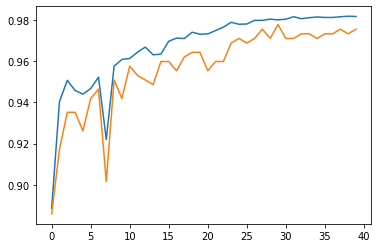

In [42]:
plt.plot(tbnet_clfr_best.history['training_accuracy'])
plt.plot(tbnet_clfr_best.history['validation_accuracy'])


In [45]:
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report
preds = tbnet_clfr_best.predict_proba(X_val.values)[:, -1]

In [46]:
print('auc:', roc_auc_score(y_val.values, preds))

auc: 0.9908732417269697


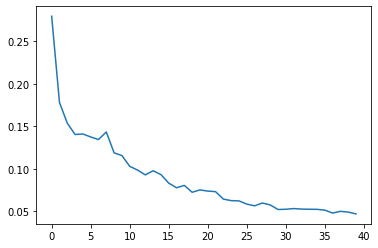

In [49]:
plt.plot(tbnet_clfr_best.history['loss'])

In [53]:
y_predict = tbnet_clfr_best.predict(X_val.values)
y_true, y_pred = y_val, y_predict
print('validation accuracy:', accuracy_score(y_true, y_pred))

validation accuracy: 0.9776286353467561


In [55]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       196
           1       0.97      1.00      0.98       251

    accuracy                           0.98       447
   macro avg       0.98      0.98      0.98       447
weighted avg       0.98      0.98      0.98       447



In [56]:
feat_importances = tbnet_clfr_best.feature_importances_
indices = np.argsort(feat_importances)

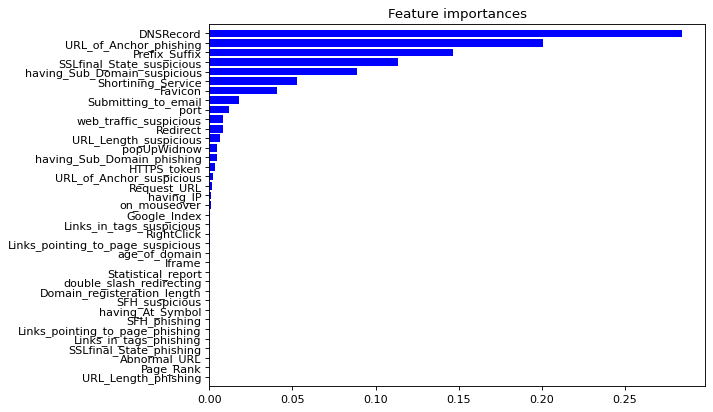

In [57]:
plt.figure(figsize=(8, 6), dpi=80)
plt.title("Feature importances")
plt.barh(range(len(feat_importances)), feat_importances[indices],
       color="b", align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(len(feat_importances)), [X.columns[idx] for idx in indices])
plt.ylim([-1, len(feat_importances)])
plt.show()

In [59]:
saved_filename = tbnet_clfr_best.save_model('TabNetClassifier_9776')

Successfully saved model at TabNetClassifier_9776.zip


In [17]:
loaded_clf = TabNetClassifier()
loaded_clf.load_model('TabNetClassifier_9776.zip')

Device used : cuda
Device used : cuda


In [20]:
test_output = pd.DataFrame(columns =['Key', 'Result'])  

In [23]:
test_output['Key'],test_output['Result'] = test_data.index, loaded_clf.predict(test_data.values)

In [26]:
test_output.to_csv('TabNetClassifier_testoutput.csv',index=False) 

### Use CatBoostClassifier

In [51]:
from catboost import CatBoostClassifier

In [52]:
data_categories = np.where(X_train.dtypes != np.float)[0]

In [53]:
params = {'iterations':100,
        'learning_rate':0.5,
        'cat_features':data_categories,
         'loss_function':'Logloss',
        'depth':2,
        'eval_metric':'Accuracy',
        'verbose':True,
         }

In [54]:
model_classifier = CatBoostClassifier(**params)
                       
model_classifier.fit(X_train, y_train, 
                     eval_set=(X_val, y_val),  
                     use_best_model=True, 
                     plot= True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8921016	test: 0.8903803	best: 0.8903803 (0)	total: 2.31ms	remaining: 229ms
1:	learn: 0.9063235	test: 0.8948546	best: 0.8948546 (1)	total: 4.34ms	remaining: 213ms
2:	learn: 0.9164316	test: 0.9105145	best: 0.9105145 (2)	total: 6.49ms	remaining: 210ms
3:	learn: 0.9183122	test: 0.9149888	best: 0.9149888 (3)	total: 8.28ms	remaining: 199ms
4:	learn: 0.9244241	test: 0.9194631	best: 0.9194631 (4)	total: 10.3ms	remaining: 196ms
5:	learn: 0.9245416	test: 0.9172260	best: 0.9194631 (4)	total: 12.2ms	remaining: 191ms
6:	learn: 0.9247767	test: 0.9172260	best: 0.9194631 (4)	total: 14.5ms	remaining: 192ms
7:	learn: 0.9258345	test: 0.9149888	best: 0.9194631 (4)	total: 16.7ms	remaining: 192ms
8:	learn: 0.9264222	test: 0.9194631	best: 0.9194631 (4)	total: 19ms	remaining: 192ms
9:	learn: 0.9292431	test: 0.9239374	best: 0.9239374 (9)	total: 20.8ms	remaining: 187ms
10:	learn: 0.9318289	test: 0.9217002	best: 0.9239374 (9)	total: 22.8ms	remaining: 184ms
11:	learn: 0.9306535	test: 0.9239374	best: 0

In [56]:
preds = model_classifier.predict(X_val)

pred_labels = np.rint(preds)

accuracy = accuracy_score(y_val, pred_labels)
print(accuracy)

0.9440715883668904


In [29]:
def objective_catBoost(trial):
    param = {

        "objective": "Logloss",

        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),

        "depth": trial.suggest_int("depth", 1, 12),

        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),

        "bootstrap_type": trial.suggest_categorical(

            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]

        ),

    }

    if param["bootstrap_type"] == "Bayesian":

        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)

    elif param["bootstrap_type"] == "Bernoulli":

        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    gbm = CatBoostClassifier(**param)
    preds = gbm.predict(X_val)

    pred_labels = np.rint(preds)

    accuracy = accuracy_score(y_val, pred_labels)

    return accuracy


 

In [ ]:
study_CatBoost = optuna.create_study(direction="maximize", study_name='CatBoost -  Phishing  optimization',

                            pruner=optuna.pruners.MedianPruner(n_warmup_steps=10))

study_CatBoost.optimize(objective_catBoost,n_trials=100, timeout = 3600*8)

 

print('Number of finished trials:', len(study_CatBoost.trials))

print('Best trial:', study_CatBoost.best_trial.params)

In [57]:
catBoost_best_param = {
    'colsample_bylevel': 0.07877753917062359,
    'depth': 10, 
    'boosting_type': 'Plain', 
    'bootstrap_type': 'Bernoulli', 
    'subsample': 0.3573888739013905
    }

In [58]:
 gbm_best = CatBoostClassifier(**catBoost_best_param)

In [59]:
hist = gbm_best.fit(X_train,y_train,eval_set=[(X_train, y_train), (X_val, y_val)],verbose=1, early_stopping_rounds=100)

Learning rate set to 0.053775
0:	learn: 0.6606498	test: 0.6606667	test1: 0.6604372	best: 0.6604372 (0)	total: 3.53ms	remaining: 3.53s
1:	learn: 0.6533823	test: 0.6533990	test1: 0.6524935	best: 0.6524935 (1)	total: 5.29ms	remaining: 2.64s
2:	learn: 0.5851948	test: 0.5852321	test1: 0.5854340	best: 0.5854340 (2)	total: 7.47ms	remaining: 2.48s
3:	learn: 0.5844955	test: 0.5845326	test1: 0.5847319	best: 0.5847319 (3)	total: 8.63ms	remaining: 2.15s
4:	learn: 0.5677406	test: 0.5677785	test1: 0.5694193	best: 0.5694193 (4)	total: 11ms	remaining: 2.19s
5:	learn: 0.5064542	test: 0.5064851	test1: 0.5068902	best: 0.5068902 (5)	total: 13.6ms	remaining: 2.26s
6:	learn: 0.4638225	test: 0.4638418	test1: 0.4638834	best: 0.4638834 (6)	total: 25.2ms	remaining: 3.58s
7:	learn: 0.4159515	test: 0.4159544	test1: 0.4154128	best: 0.4154128 (7)	total: 28.8ms	remaining: 3.57s
8:	learn: 0.3877415	test: 0.3877499	test1: 0.3878270	best: 0.3878270 (8)	total: 40.4ms	remaining: 4.45s
9:	learn: 0.3852449	test: 0.3852554	

115:	learn: 0.1129854	test: 0.1130001	test1: 0.1459883	best: 0.1459883 (115)	total: 626ms	remaining: 4.77s
116:	learn: 0.1121413	test: 0.1121559	test1: 0.1450764	best: 0.1450764 (116)	total: 636ms	remaining: 4.8s
117:	learn: 0.1111462	test: 0.1111607	test1: 0.1443172	best: 0.1443172 (117)	total: 646ms	remaining: 4.82s
118:	learn: 0.1110946	test: 0.1111091	test1: 0.1442561	best: 0.1442561 (118)	total: 647ms	remaining: 4.79s
119:	learn: 0.1110751	test: 0.1110896	test1: 0.1442478	best: 0.1442478 (119)	total: 649ms	remaining: 4.76s
120:	learn: 0.1099985	test: 0.1100126	test1: 0.1435712	best: 0.1435712 (120)	total: 658ms	remaining: 4.78s
121:	learn: 0.1099654	test: 0.1099796	test1: 0.1436032	best: 0.1435712 (120)	total: 660ms	remaining: 4.75s
122:	learn: 0.1097345	test: 0.1097484	test1: 0.1434512	best: 0.1434512 (122)	total: 663ms	remaining: 4.72s
123:	learn: 0.1092914	test: 0.1093054	test1: 0.1430335	best: 0.1430335 (123)	total: 672ms	remaining: 4.75s
124:	learn: 0.1083753	test: 0.1083890	

221:	learn: 0.0813930	test: 0.0814045	test1: 0.1189241	best: 0.1185392 (217)	total: 1.23s	remaining: 4.32s
222:	learn: 0.0813625	test: 0.0813738	test1: 0.1189046	best: 0.1185392 (217)	total: 1.23s	remaining: 4.3s
223:	learn: 0.0810767	test: 0.0810880	test1: 0.1185635	best: 0.1185392 (217)	total: 1.24s	remaining: 4.29s
224:	learn: 0.0810578	test: 0.0810690	test1: 0.1185353	best: 0.1185353 (224)	total: 1.24s	remaining: 4.27s
225:	learn: 0.0809737	test: 0.0809849	test1: 0.1184520	best: 0.1184520 (225)	total: 1.24s	remaining: 4.25s
226:	learn: 0.0807874	test: 0.0807987	test1: 0.1183258	best: 0.1183258 (226)	total: 1.25s	remaining: 4.26s
227:	learn: 0.0807013	test: 0.0807126	test1: 0.1182384	best: 0.1182384 (227)	total: 1.25s	remaining: 4.25s
228:	learn: 0.0803549	test: 0.0803664	test1: 0.1179358	best: 0.1179358 (228)	total: 1.26s	remaining: 4.26s
229:	learn: 0.0801409	test: 0.0801525	test1: 0.1177167	best: 0.1177167 (229)	total: 1.27s	remaining: 4.27s
230:	learn: 0.0801343	test: 0.0801459	

324:	learn: 0.0662325	test: 0.0662418	test1: 0.1078034	best: 0.1078034 (324)	total: 1.83s	remaining: 3.8s
325:	learn: 0.0661085	test: 0.0661178	test1: 0.1079841	best: 0.1078034 (324)	total: 1.83s	remaining: 3.79s
326:	learn: 0.0659123	test: 0.0659216	test1: 0.1079196	best: 0.1078034 (324)	total: 1.84s	remaining: 3.79s
327:	learn: 0.0659091	test: 0.0659184	test1: 0.1079232	best: 0.1078034 (324)	total: 1.84s	remaining: 3.77s
328:	learn: 0.0658313	test: 0.0658405	test1: 0.1078803	best: 0.1078034 (324)	total: 1.85s	remaining: 3.77s
329:	learn: 0.0657869	test: 0.0657961	test1: 0.1078231	best: 0.1078034 (324)	total: 1.85s	remaining: 3.76s
330:	learn: 0.0657031	test: 0.0657120	test1: 0.1077192	best: 0.1077192 (330)	total: 1.85s	remaining: 3.75s
331:	learn: 0.0655679	test: 0.0655770	test1: 0.1074668	best: 0.1074668 (331)	total: 1.86s	remaining: 3.75s
332:	learn: 0.0653155	test: 0.0653247	test1: 0.1073487	best: 0.1073487 (332)	total: 1.87s	remaining: 3.75s
333:	learn: 0.0651985	test: 0.0652076	

424:	learn: 0.0567666	test: 0.0567753	test1: 0.1010701	best: 0.1010701 (424)	total: 2.43s	remaining: 3.29s
425:	learn: 0.0567666	test: 0.0567753	test1: 0.1010702	best: 0.1010701 (424)	total: 2.43s	remaining: 3.27s
426:	learn: 0.0567581	test: 0.0567667	test1: 0.1011305	best: 0.1010701 (424)	total: 2.43s	remaining: 3.27s
427:	learn: 0.0565921	test: 0.0566007	test1: 0.1011919	best: 0.1010701 (424)	total: 2.44s	remaining: 3.27s
428:	learn: 0.0565921	test: 0.0566007	test1: 0.1011918	best: 0.1010701 (424)	total: 2.44s	remaining: 3.25s
429:	learn: 0.0565458	test: 0.0565543	test1: 0.1012260	best: 0.1010701 (424)	total: 2.45s	remaining: 3.25s
430:	learn: 0.0564126	test: 0.0564210	test1: 0.1013959	best: 0.1010701 (424)	total: 2.46s	remaining: 3.25s
431:	learn: 0.0563065	test: 0.0563150	test1: 0.1013756	best: 0.1010701 (424)	total: 2.47s	remaining: 3.25s
432:	learn: 0.0562283	test: 0.0562367	test1: 0.1012304	best: 0.1010701 (424)	total: 2.48s	remaining: 3.25s
433:	learn: 0.0561966	test: 0.0562049

524:	learn: 0.0507555	test: 0.0507628	test1: 0.0984601	best: 0.0984133 (523)	total: 3.03s	remaining: 2.74s
525:	learn: 0.0507099	test: 0.0507170	test1: 0.0984145	best: 0.0984133 (523)	total: 3.03s	remaining: 2.73s
526:	learn: 0.0506834	test: 0.0506905	test1: 0.0984243	best: 0.0984133 (523)	total: 3.04s	remaining: 2.72s
527:	learn: 0.0506251	test: 0.0506321	test1: 0.0984525	best: 0.0984133 (523)	total: 3.04s	remaining: 2.72s
528:	learn: 0.0506243	test: 0.0506314	test1: 0.0984499	best: 0.0984133 (523)	total: 3.05s	remaining: 2.71s
529:	learn: 0.0506243	test: 0.0506314	test1: 0.0984499	best: 0.0984133 (523)	total: 3.05s	remaining: 2.7s
530:	learn: 0.0505989	test: 0.0506059	test1: 0.0985452	best: 0.0984133 (523)	total: 3.05s	remaining: 2.69s
531:	learn: 0.0505989	test: 0.0506059	test1: 0.0985452	best: 0.0984133 (523)	total: 3.05s	remaining: 2.69s
532:	learn: 0.0505989	test: 0.0506059	test1: 0.0985450	best: 0.0984133 (523)	total: 3.05s	remaining: 2.67s
533:	learn: 0.0505826	test: 0.0505897	

618:	learn: 0.0473042	test: 0.0473112	test1: 0.0978190	best: 0.0977689 (615)	total: 3.63s	remaining: 2.23s
619:	learn: 0.0471711	test: 0.0471781	test1: 0.0977953	best: 0.0977689 (615)	total: 3.64s	remaining: 2.23s
620:	learn: 0.0471373	test: 0.0471443	test1: 0.0978079	best: 0.0977689 (615)	total: 3.65s	remaining: 2.23s
621:	learn: 0.0471300	test: 0.0471370	test1: 0.0978112	best: 0.0977689 (615)	total: 3.65s	remaining: 2.22s
622:	learn: 0.0470948	test: 0.0471018	test1: 0.0979707	best: 0.0977689 (615)	total: 3.66s	remaining: 2.22s
623:	learn: 0.0470858	test: 0.0470928	test1: 0.0980001	best: 0.0977689 (615)	total: 3.67s	remaining: 2.21s
624:	learn: 0.0469446	test: 0.0469516	test1: 0.0980205	best: 0.0977689 (615)	total: 3.67s	remaining: 2.21s
625:	learn: 0.0469446	test: 0.0469516	test1: 0.0980205	best: 0.0977689 (615)	total: 3.68s	remaining: 2.2s
626:	learn: 0.0469167	test: 0.0469237	test1: 0.0980803	best: 0.0977689 (615)	total: 3.69s	remaining: 2.19s
627:	learn: 0.0469167	test: 0.0469237	

717:	learn: 0.0441805	test: 0.0441874	test1: 0.0978931	best: 0.0975912 (702)	total: 4.23s	remaining: 1.66s
718:	learn: 0.0440212	test: 0.0440279	test1: 0.0978960	best: 0.0975912 (702)	total: 4.24s	remaining: 1.66s
719:	learn: 0.0440093	test: 0.0440160	test1: 0.0978815	best: 0.0975912 (702)	total: 4.25s	remaining: 1.65s
720:	learn: 0.0439808	test: 0.0439875	test1: 0.0977993	best: 0.0975912 (702)	total: 4.25s	remaining: 1.65s
721:	learn: 0.0439573	test: 0.0439640	test1: 0.0978654	best: 0.0975912 (702)	total: 4.27s	remaining: 1.64s
722:	learn: 0.0438840	test: 0.0438908	test1: 0.0977672	best: 0.0975912 (702)	total: 4.27s	remaining: 1.64s
723:	learn: 0.0438560	test: 0.0438627	test1: 0.0977401	best: 0.0975912 (702)	total: 4.28s	remaining: 1.63s
724:	learn: 0.0438259	test: 0.0438324	test1: 0.0978845	best: 0.0975912 (702)	total: 4.29s	remaining: 1.63s
725:	learn: 0.0438099	test: 0.0438164	test1: 0.0978893	best: 0.0975912 (702)	total: 4.3s	remaining: 1.62s
726:	learn: 0.0436840	test: 0.0436905	

807:	learn: 0.0417271	test: 0.0417340	test1: 0.0976747	best: 0.0973850 (757)	total: 4.83s	remaining: 1.15s
808:	learn: 0.0417052	test: 0.0417120	test1: 0.0976614	best: 0.0973850 (757)	total: 4.84s	remaining: 1.14s
809:	learn: 0.0417049	test: 0.0417117	test1: 0.0976626	best: 0.0973850 (757)	total: 4.84s	remaining: 1.14s
810:	learn: 0.0417048	test: 0.0417116	test1: 0.0976636	best: 0.0973850 (757)	total: 4.85s	remaining: 1.13s
811:	learn: 0.0416975	test: 0.0417044	test1: 0.0976719	best: 0.0973850 (757)	total: 4.85s	remaining: 1.12s
812:	learn: 0.0416864	test: 0.0416932	test1: 0.0976330	best: 0.0973850 (757)	total: 4.86s	remaining: 1.12s
813:	learn: 0.0416864	test: 0.0416932	test1: 0.0976329	best: 0.0973850 (757)	total: 4.86s	remaining: 1.11s
814:	learn: 0.0416863	test: 0.0416932	test1: 0.0976329	best: 0.0973850 (757)	total: 4.86s	remaining: 1.1s
815:	learn: 0.0416567	test: 0.0416636	test1: 0.0977060	best: 0.0973850 (757)	total: 4.87s	remaining: 1.1s
816:	learn: 0.0416092	test: 0.0416161	t

In [60]:
preds = gbm_best.predict(X_val)
pred_labels = np.rint(preds)
accuracy = accuracy_score(y_val, pred_labels)
print(accuracy)

0.9664429530201343


In [61]:
print(classification_report(y_val, pred_labels))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       196
           1       0.96      0.98      0.97       251

    accuracy                           0.97       447
   macro avg       0.97      0.96      0.97       447
weighted avg       0.97      0.97      0.97       447

